# Project3 - Personal Loan Campaign

## Problem Statement

* AllLife Bank is a US bank that has a growing customer base, and Most of customers are depositors.
* The number of customers who are also asset customers is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business.
* Management is looking for ways to convert responsible customers into personal loan customers while retaining them as depositors.
* A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success.
* The banks want to increase the success ratio of personal loan conversion.

## Objective

* Build a decision tree model to predict whether a liability customer will accept a personal loan or not.
* Investigate which variables are most important.
* Investigate which customer segments you should target more.

## Data

**Loan_Modelling.csv**
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

## Loading libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build logistic regression classifier
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

<IPython.core.display.Javascript object>

## Loading and exploring the dataset

### Read the dataset

In [2]:
raw_data = pd.read_csv("Loan_modelling.csv")
# copying data to another varaible to avoid any changes to original data
loan = raw_data.copy()

<IPython.core.display.Javascript object>

In [3]:
# checking the shape of the data
loan.shape

(5000, 14)

<IPython.core.display.Javascript object>

* The dataset has 5000 rows and 14 columns

### View the first, last and random 5 rows of the dataset.

In [4]:
loan.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [5]:
loan.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


<IPython.core.display.Javascript object>

In [6]:
loan.sample(n=5, random_state=1)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0


<IPython.core.display.Javascript object>

### Remove ID column and check duplicates.

In [7]:
loan.drop(["ID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [8]:
loan.duplicated().sum()

0

<IPython.core.display.Javascript object>

* No duplicates were found within the data.

### Check the data types of the columns for the dataset.

In [9]:
# checking column datatypes and number of non-null values
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


<IPython.core.display.Javascript object>

* There is no missing value in dataset.
* Personal_Loan is the dependent variable - type integer.
* Some variables can be converted to categorical variables. (e.g. ZIPCode, Education )

### Summary of the dataset.

In [10]:
loan.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


<IPython.core.display.Javascript object>

* The range of Age is from 23 to 67, with an average value of 45.3.
* The maximum value of Experience is 43, the average value is about 20, and a minimum value less than 0 seems to require further investigation.
* Income ranges from 8 to 224, with an average value of 73.8.
* Family ranges from 1 to 4, with an average value of 2.4.
* CCAvg ranges from 0 to 10, with an average value of 1.9.
* Mortgage ranges from 0 to 635, with an average value of 56.5.

## Data pre-processing

### Data cleaning

#### Check data with negative value in Experience

In [11]:
loan[loan["Experience"] < 0].shape

(52, 13)

<IPython.core.display.Javascript object>

In [12]:
loan[loan["Experience"] < 0].sample(n=15, random_state=1)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3130,23,-2,82,92152,2,1.80,2,0,0,1,0,0,1
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
3946,25,-1,40,93117,3,2.40,2,0,0,0,0,1,0
3157,23,-1,13,94720,4,1.00,1,84,0,0,0,1,0
3076,29,-1,62,92672,2,1.75,3,0,0,0,0,0,1
4116,24,-2,135,90065,2,7.20,1,0,0,0,0,1,0
3279,26,-1,44,94901,1,2.00,2,0,0,0,0,0,0
3626,24,-3,28,90089,4,1.00,3,0,0,0,0,0,0
4088,29,-1,71,94801,2,1.75,3,0,0,0,0,0,0
1905,25,-1,112,92507,2,2.00,1,241,0,0,0,1,0


<IPython.core.display.Javascript object>

In [13]:
loan[loan["Experience"] < 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,52.0,24.519231,1.475159,23.0,24.00,24.0,25.000,29.0
Experience,52.0,-1.442308,0.639039,-3.0,-2.00,-1.0,-1.000,-1.0
Income,52.0,69.942308,37.955295,12.0,40.75,65.5,86.750,150.0
ZIPCode,52.0,93240.961538,1611.654806,90065.0,92167.75,93060.0,94720.000,95842.0
Family,52.0,2.865385,0.970725,1.0,2.00,3.0,4.000,4.0
CCAvg,52.0,2.129423,1.750562,0.2,1.00,1.8,2.325,7.2
Education,52.0,2.076923,0.836570,1.0,1.00,2.0,3.000,3.0
Mortgage,52.0,43.596154,90.027068,0.0,0.00,0.0,0.000,314.0
Personal_Loan,52.0,0.000000,0.000000,0.0,0.00,0.0,0.000,0.0
Securities_Account,52.0,0.115385,0.322603,0.0,0.00,0.0,0.000,1.0


<IPython.core.display.Javascript object>

In [14]:
loan[loan["Age"] < 26].shape

(93, 13)

<IPython.core.display.Javascript object>

* It has been observed that the majority of customers with negative experience values are younger customers in their mid-20s and younger, which is thought to be a sign of non-professional experience. 
* If all of that data with negative Experience value is deleted, about half of the data for customers under the age of 25 will be deleted, so instead of dropping the data, I decided to replace the negative Experience value with 0.

#### Replace values less than 0 with 0 in Experience column

In [15]:
loan.loc[loan["Experience"] < 0, "Experience"] = 0
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.119600,11.440484,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


<IPython.core.display.Javascript object>

### Merging ZIPCode

* In the ZIP Code, the following two digits represent a division of a narrow area and were merged using only the first three digits.

In [16]:
# check the unique value of ZIPCode
len(loan["ZIPCode"].unique())

467

<IPython.core.display.Javascript object>

In [17]:
loan["ZIPCode"].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94087      1
91024      1
93077      1
94598      1
Name: ZIPCode, Length: 467, dtype: int64

<IPython.core.display.Javascript object>

In [18]:
loan["ZIPCode"] = loan["ZIPCode"].apply(lambda x: str(x // 100) + "XX")

<IPython.core.display.Javascript object>

In [19]:
# check the unique value of ZIPCode after merging
len(loan["ZIPCode"].unique())

57

<IPython.core.display.Javascript object>

In [20]:
loan["ZIPCode"].value_counts()

900XX    375
921XX    279
950XX    267
945XX    264
941XX    257
943XX    257
947XX    251
920XX    248
940XX    242
913XX    222
926XX    182
956XX    162
902XX    161
917XX    150
958XX    141
931XX    134
939XX    102
951XX     96
946XX     89
928XX     81
949XX     75
911XX     71
927XX     62
923XX     60
930XX     58
925XX     49
907XX     45
934XX     43
919XX     41
957XX     40
906XX     38
935XX     36
904XX     35
955XX     32
916XX     29
960XX     29
910XX     29
905XX     28
953XX     26
959XX     19
908XX     19
954XX     19
933XX     18
937XX     18
948XX     17
924XX     17
944XX     13
952XX     13
914XX     13
922XX     10
936XX      8
912XX      7
942XX      7
966XX      6
961XX      5
918XX      3
903XX      2
Name: ZIPCode, dtype: int64

<IPython.core.display.Javascript object>

* It was observed that the largest number of customers resided in Los Angeles (zipcode: 900XX) and the fewest were in Inglewood (zipcode: 903XX).
* After merging, 467 zipcodes were reduced to 57 categories.

## EDA - Univariate analysis

### Functions

In [21]:
def hist_box(data, feature, figsize=(12, 7), kde=False, bins=None):
    """

  show histogram & boxplot at once

  data : dataframe
  feature : column name
  figsize ; figure size (default (12,7))
  kde : whether to show density curve ( default false )
  bins : bin numbers ( default None)

  """

    fs, (ax_box, ax_hist) = plt.subplots(
        nrows=2, sharex=True, figsize=(12, 7), gridspec_kw={"height_ratios": (0.3, 0.7)}
    )
    sns.boxplot(data=data, ax=ax_box, x=feature, showmeans=True, color="violet")
    if bins:
        sns.histplot(data=data, ax=ax_hist, x=feature, bins=bins, kde=kde)
    else:
        sns.histplot(data=data, ax=ax_hist, x=feature, kde=kde)
    ax_hist.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  ## draw a green dotted line of mean
    ax_hist.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  ## draw a black straight line of median
    plt.show()

<IPython.core.display.Javascript object>

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Observations on Age

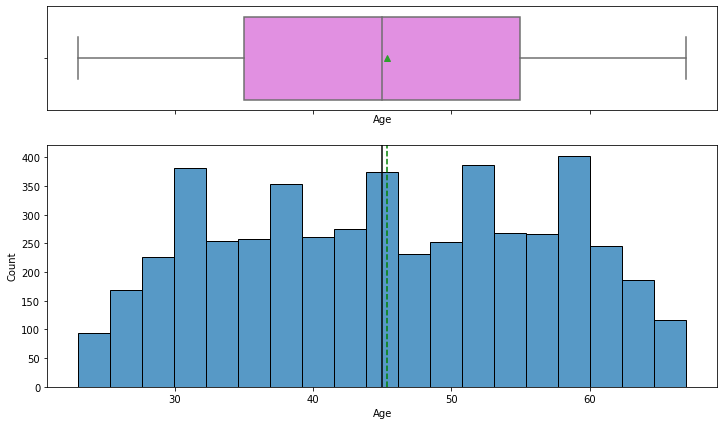

<IPython.core.display.Javascript object>

In [23]:
hist_box(loan, "Age")

* The mean and median are closely matched by about 45.
* It is rather evenly distributed, with the exception of customers in under 30s, and over 60s.

### Observations on Experience

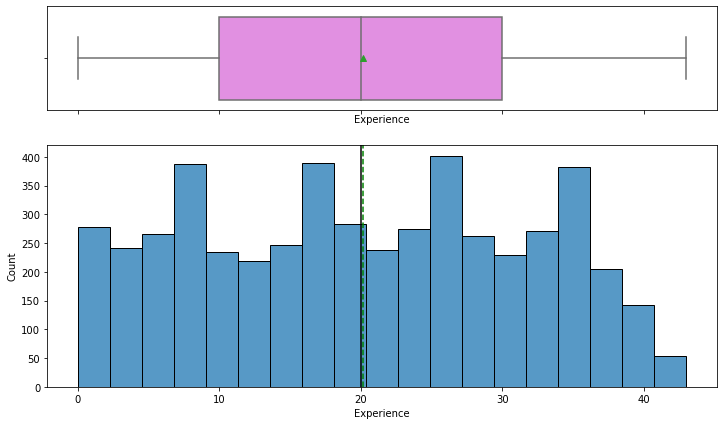

<IPython.core.display.Javascript object>

In [24]:
hist_box(loan, "Experience")

* The mean and median are closely matched by about 20.
* It is rather evenly distributed, with the exception of more than 35 years of experience.

### Observations on Income

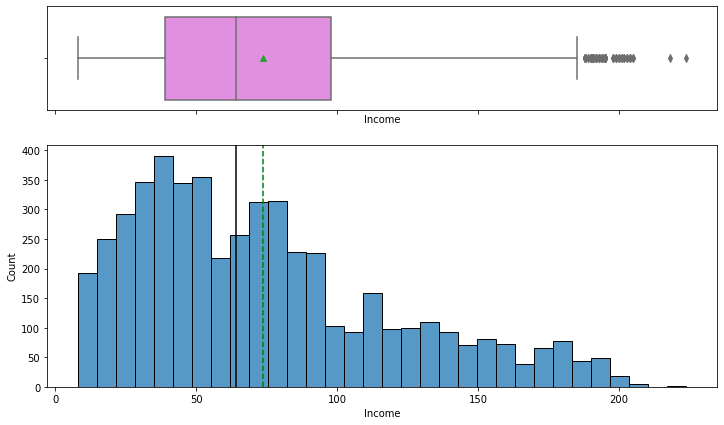

<IPython.core.display.Javascript object>

In [25]:
hist_box(loan, "Income")

* The distribution of age is right-skewed.
* The boxplot shows that there are outliers at the right end.

### Observations on ZIPCode

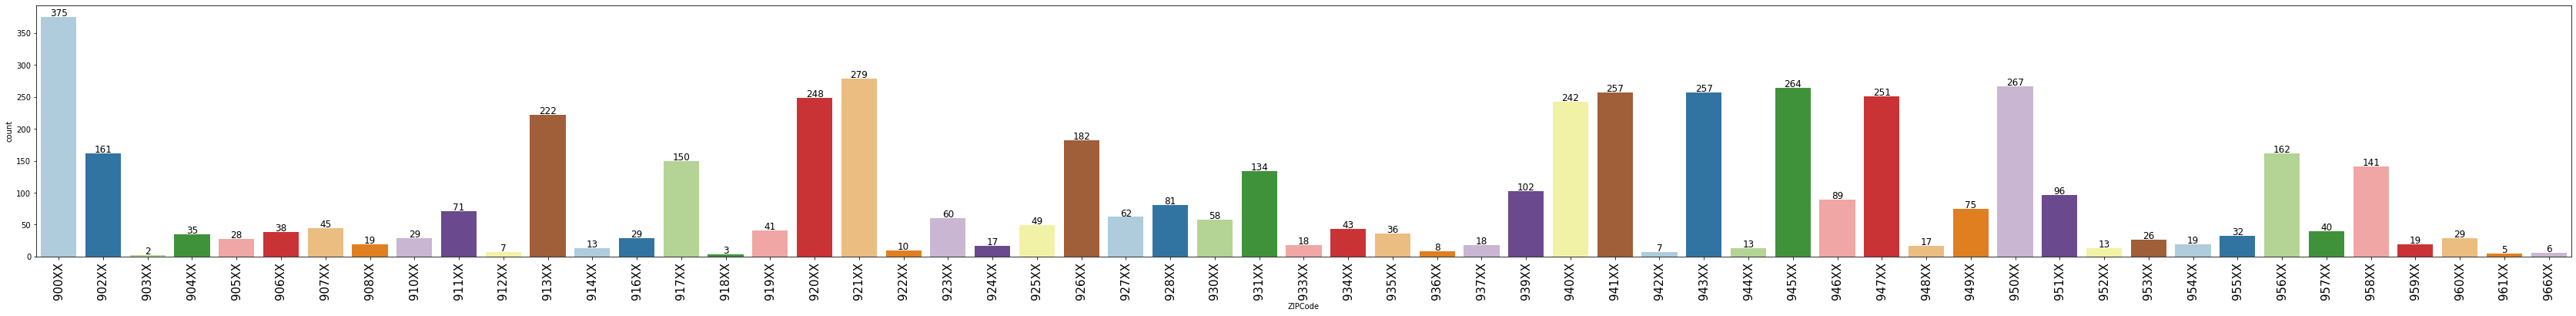

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(loan, "ZIPCode")

In [27]:
loan["ZIPCode"].value_counts().head(10)

900XX    375
921XX    279
950XX    267
945XX    264
941XX    257
943XX    257
947XX    251
920XX    248
940XX    242
913XX    222
Name: ZIPCode, dtype: int64

<IPython.core.display.Javascript object>

* It has been observed that there is a variation in the number of customers by region.

### Observations on Family

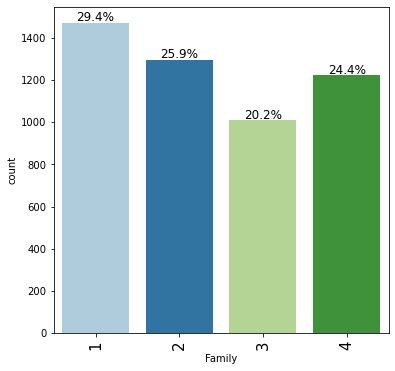

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(loan, "Family", perc=True)

* Among the customers, 1 family was observed to be the largest (29.4%) and the family of 3 was the least (20.2%).

### Observations on CCAvg

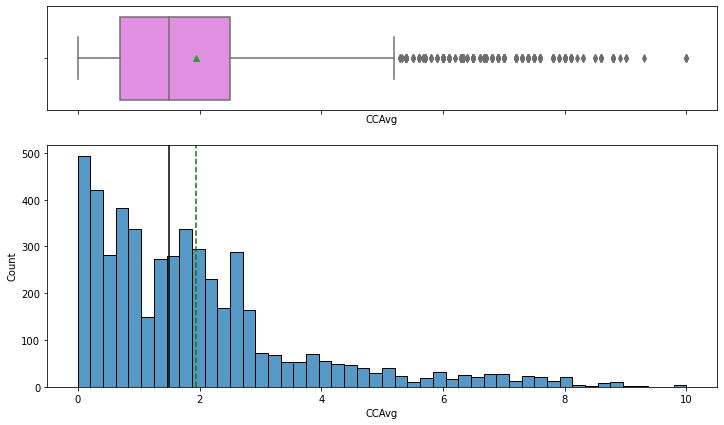

<IPython.core.display.Javascript object>

In [29]:
hist_box(loan, "CCAvg")

* The distribution of age is right-skewed.
* The boxplot shows that there are many outliers at the right end.

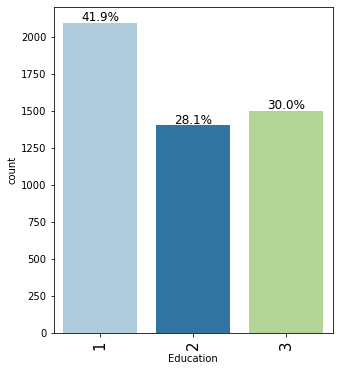

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(loan, "Education", perc=True)

* It was observed that there were the most undergrad customers (41.9%) and the fewest graduate customers (30.0%).

### Observations on Mortgage

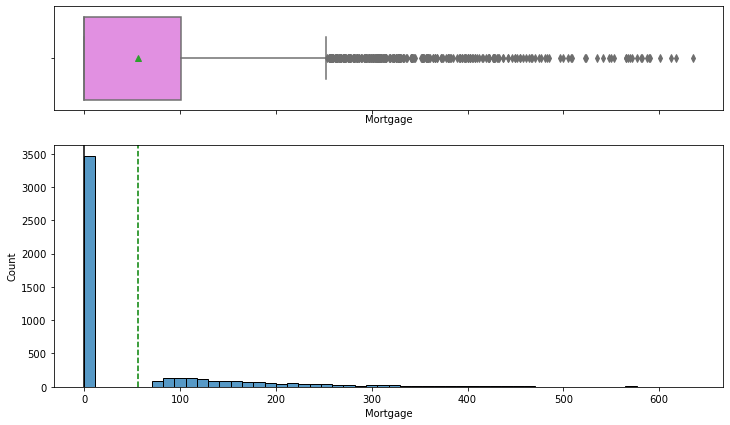

<IPython.core.display.Javascript object>

In [31]:
hist_box(loan, "Mortgage")

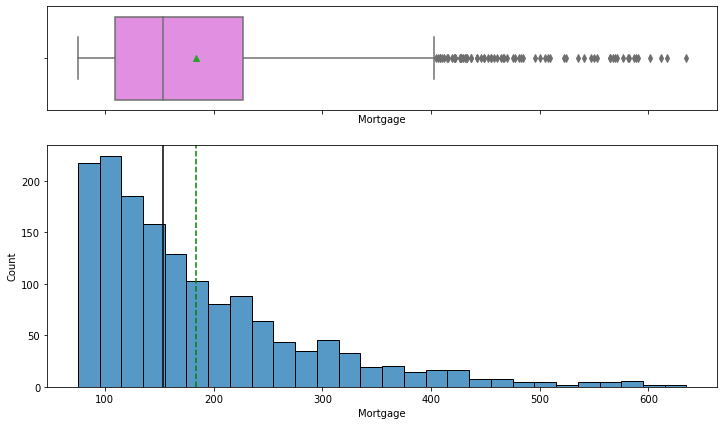

<IPython.core.display.Javascript object>

In [32]:
# plot without 0 Mortgage
hist_box(loan[loan["Mortgage"] > 0], "Mortgage")

* More than half the values were observed to be 0. ( median = 0 )
* The distribution of age is right-skewed.
* The boxplot shows that there are many outliers at the right end.

### Observations on Personal_Loan

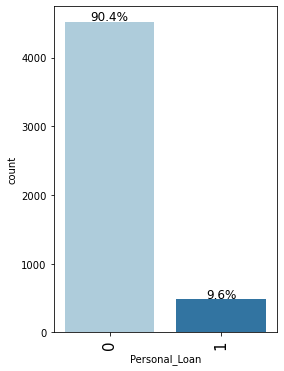

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(loan, "Personal_Loan", perc=True)

* The Personal_Loan distribution is highly imbalanced.
* Only 9.6% of customers accepted a personal loan offered in the last campaign, and 90.4% of customers did not.

### Observations on Securities_Account

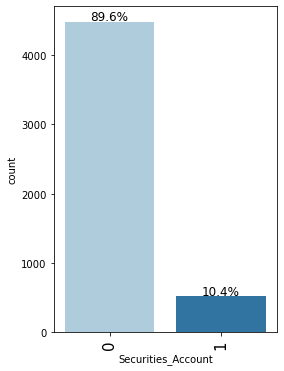

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(loan, "Securities_Account", perc=True)

* The Securities_Account distribution is highly imbalanced.
* 10.4% of customers have a securities account, and 89.6% customers doesn not.

### Observations on CD_Account

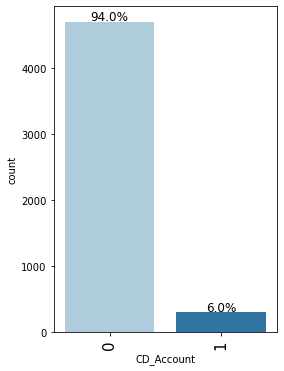

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(loan, "CD_Account", perc=True)

* The CD_Account distribution is highly imbalanced.
* Only 6.0% of customers have a certificate of deposit account, and 94.0% customers doesn not.

### Observations on Online

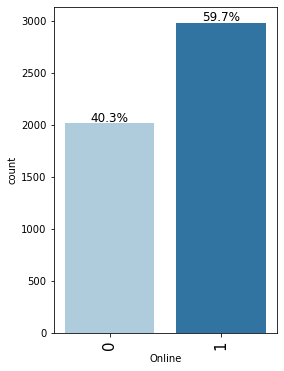

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(loan, "Online", perc=True)

* 59.7% of customers use internet banking, and 40.3% of customers does not.

### Observations on CreditCard

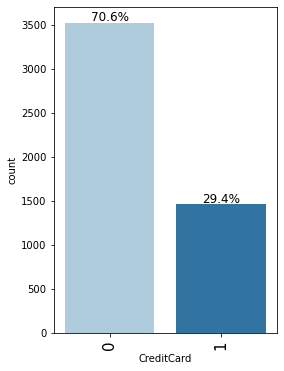

<IPython.core.display.Javascript object>

In [37]:
labeled_barplot(loan, "CreditCard", perc=True)

* The Securities_Account distribution is imbalanced.4
* 29.4% of customers use a credit card issued by other bank, and 70.6% of customers does not.

## EDA - Bivariate analysis

### Functions

In [38]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [39]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target, legend=True, annot=False):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    legend : show on/off legend
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))

    if legend == True:
        plt.legend(
            loc="lower left", frameon=False,
        )
        plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    elif legend == False:
        plt.legend([], [], frameon=False)
    plt.show()

<IPython.core.display.Javascript object>

### Pairplot

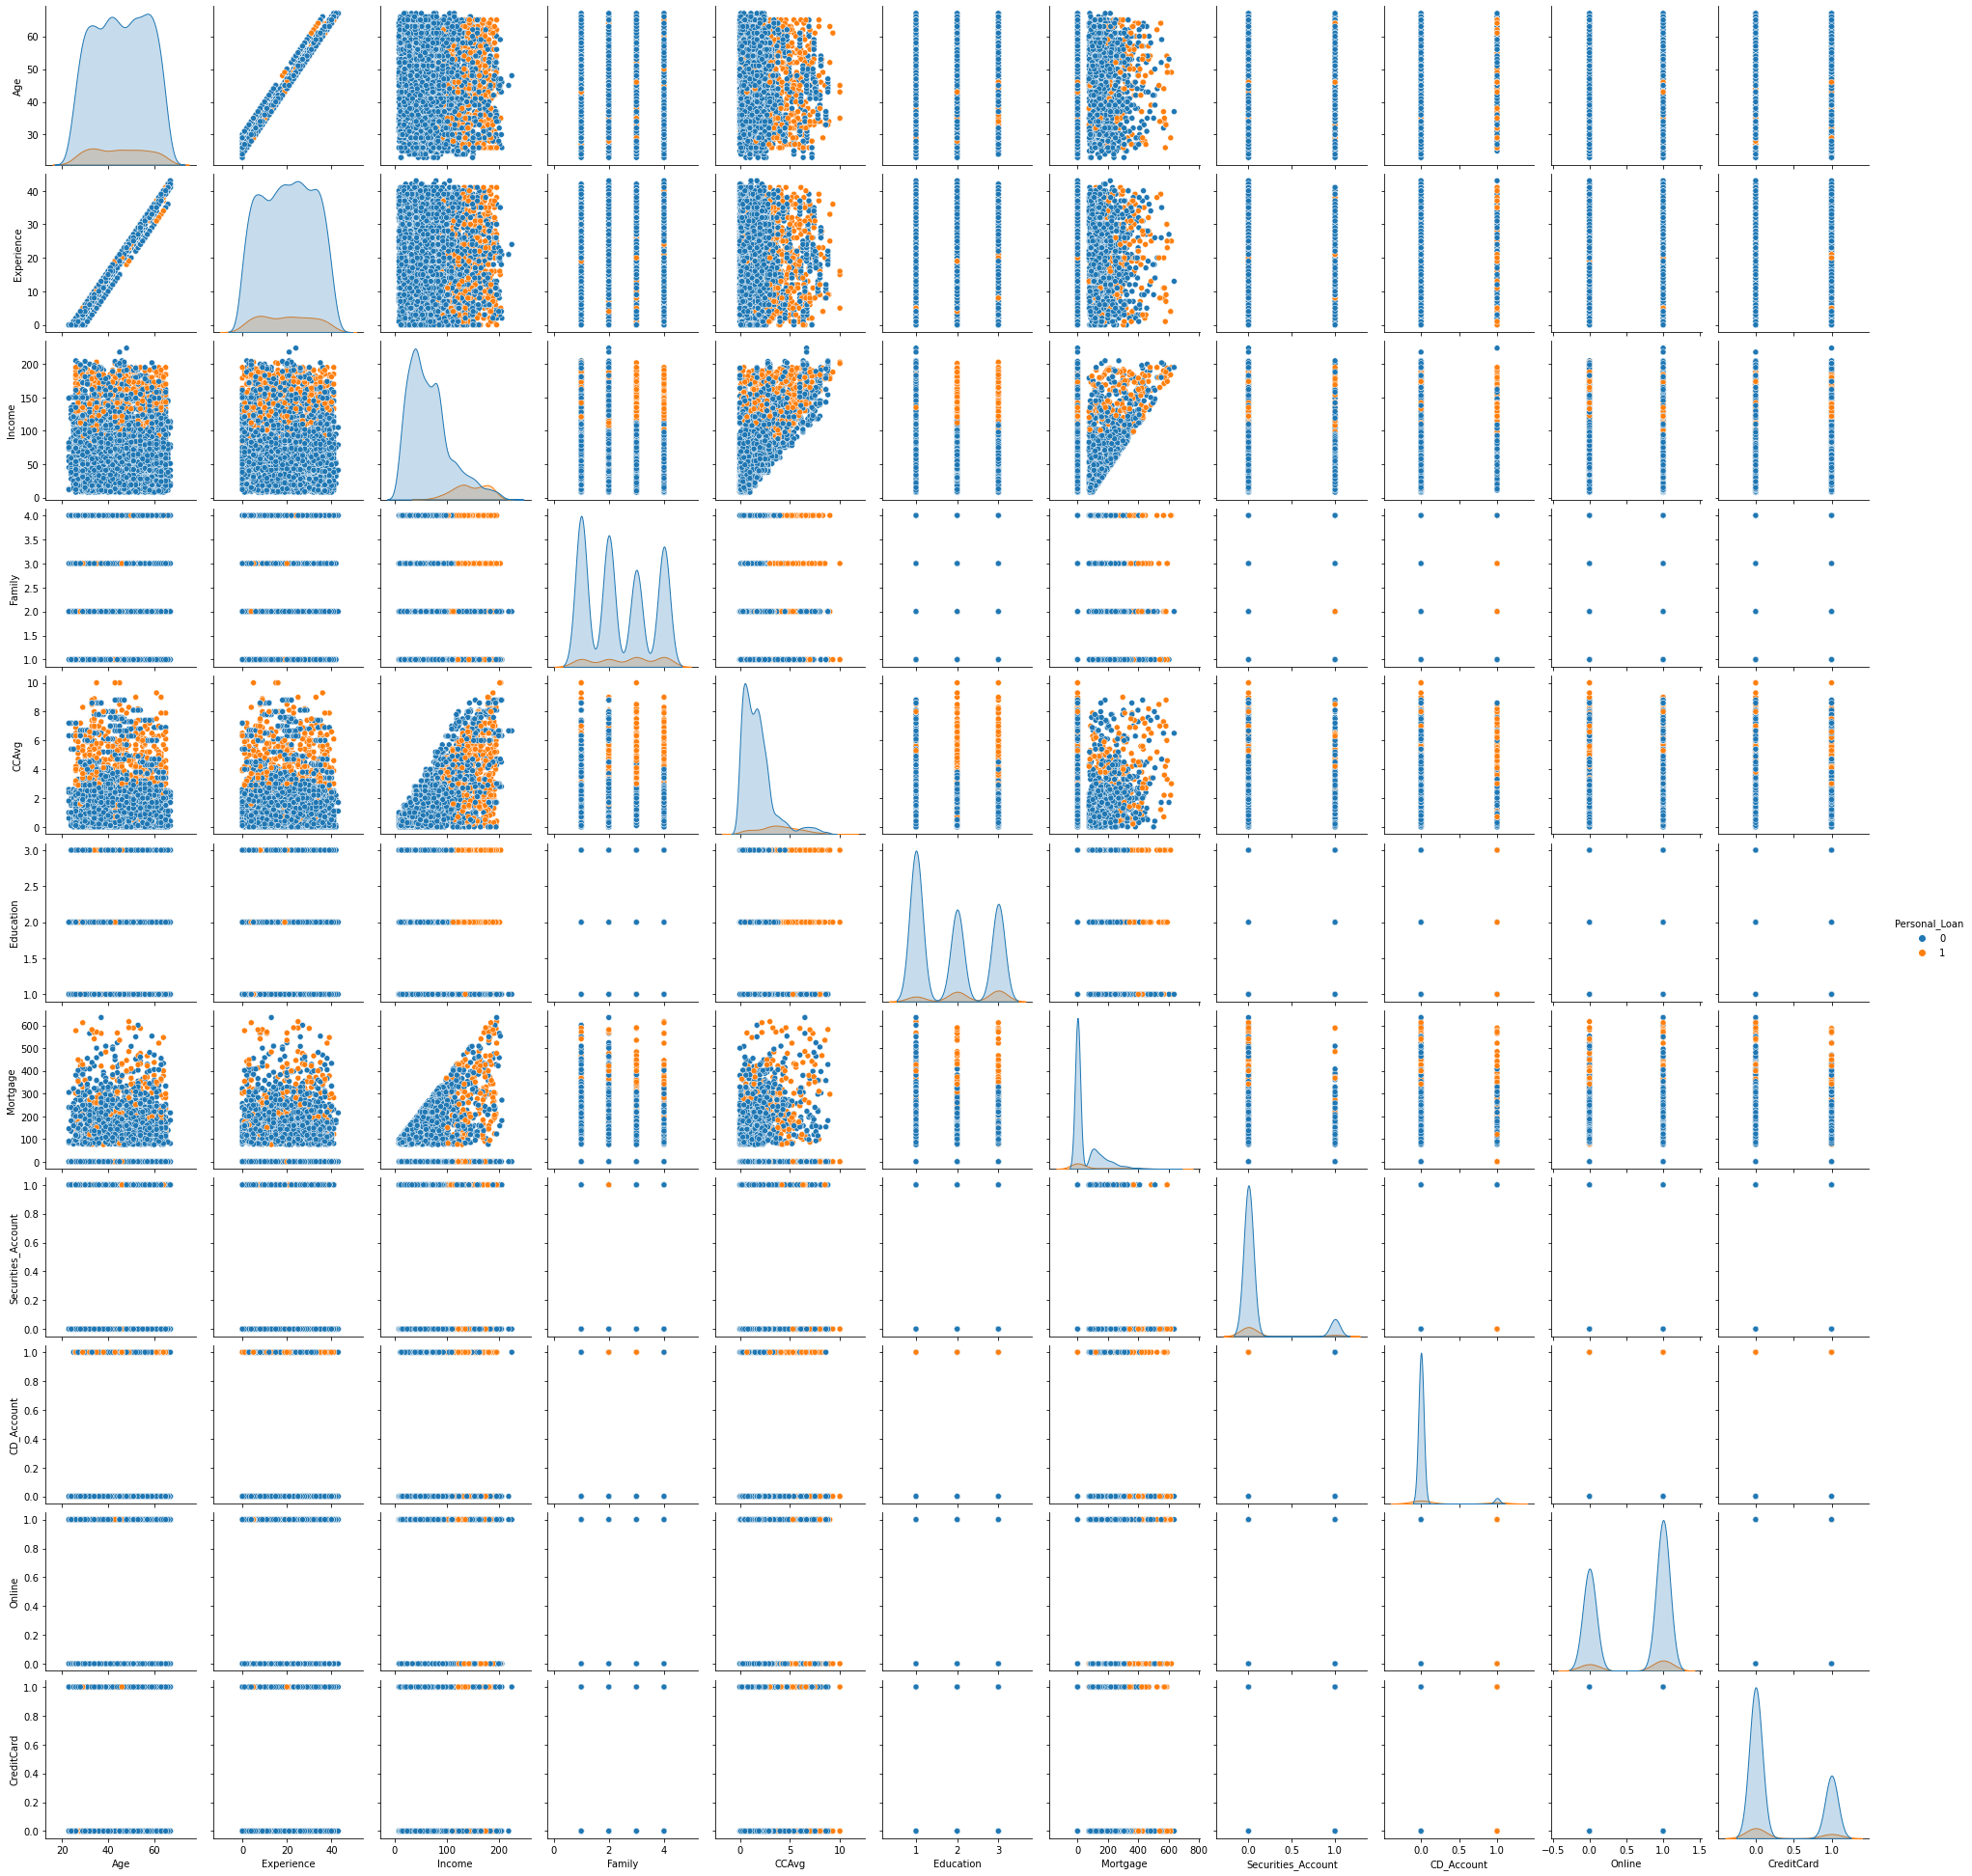

<IPython.core.display.Javascript object>

In [40]:
sns.pairplot(loan, hue="Personal_Loan")
plt.show()

### Correlation Heatmap

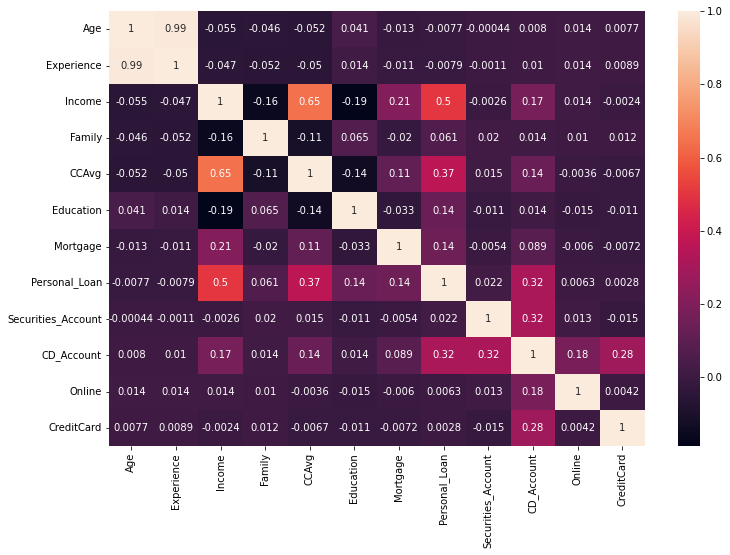

<IPython.core.display.Javascript object>

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(loan.corr(), annot=True)
plt.show()

* It has been observed that the acceptance of the personal loan offered in the last campaign is positively correlated with Income, CCAvg, and CD_Account. ( Correlation > 0.3 )

### Personal_Loan vs Age

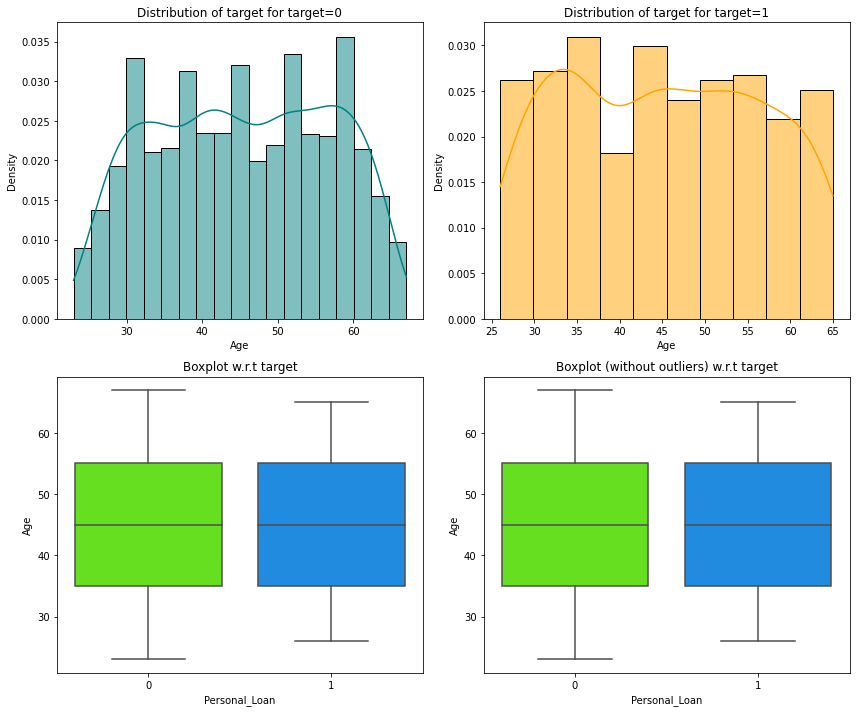

<IPython.core.display.Javascript object>

In [42]:
distribution_plot_wrt_target(loan, "Age", "Personal_Loan")

* A significant association was not observed between Age and Personal_Loan.

### Personal_Loan vs Experience

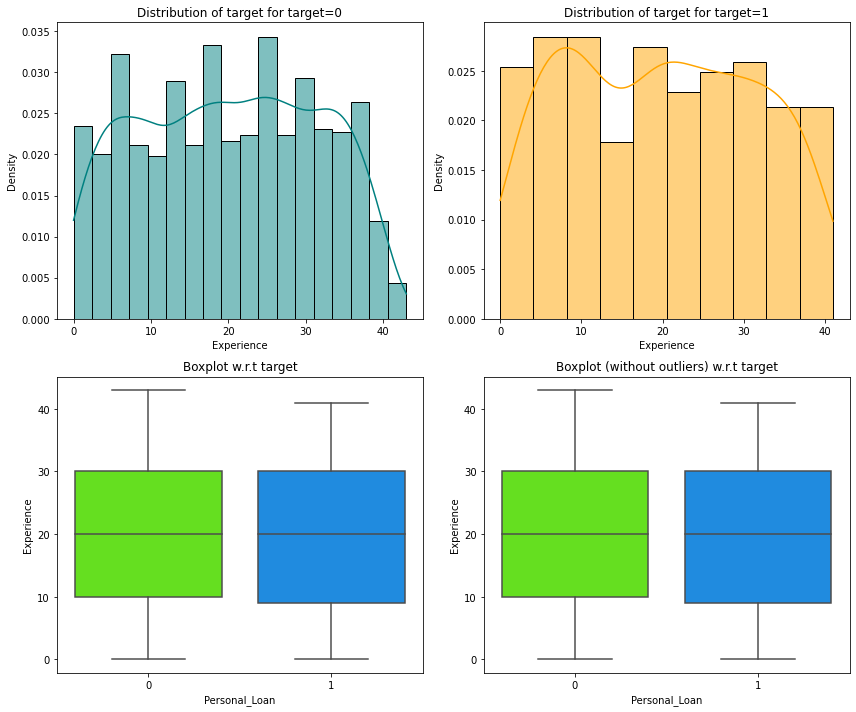

<IPython.core.display.Javascript object>

In [43]:
distribution_plot_wrt_target(loan, "Experience", "Personal_Loan")

* A significant association was not observed between Experience and Personal_Loan.

### Personal_Loan vs Income

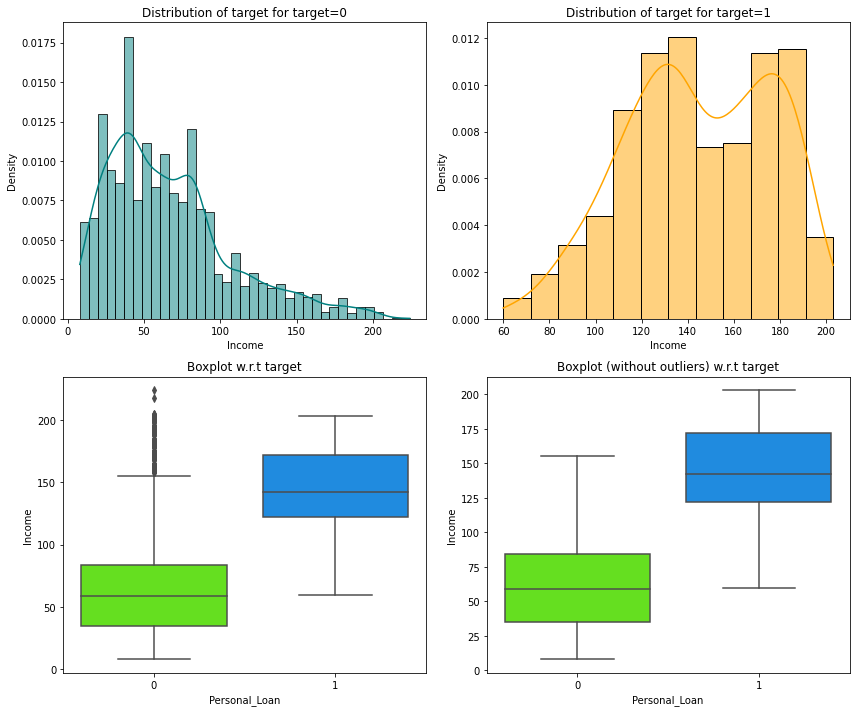

<IPython.core.display.Javascript object>

In [44]:
distribution_plot_wrt_target(loan, "Income", "Personal_Loan")

* The income of the  liability customers base who accepted the personal loans tended to be higher than those who did not.

### Personal_Loan vs ZIPCode

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
900XX           337   38   375
950XX           231   36   267
920XX           216   32   248
943XX           228   29   257
947XX           224   27   251
913XX           198   24   222
945XX           241   23   264
921XX           256   23   279
926XX           160   22   182
941XX           238   19   257
940XX           224   18   242
902XX           147   14   161
958XX           129   12   141
939XX            91   11   102
951XX            85   11    96
949XX            64   11    75
911XX            61   10    71
930XX            49    9    58
931XX           125    9   134
917XX           142    8   150
956XX           154    8   162
946XX            83    6    89
957XX            35    5    40
906XX            33    5    38
934XX            38    5    43
935XX            32    4    36
928XX            77    4    81
919XX            37    4    41
927XX            58    4    62
925XX   

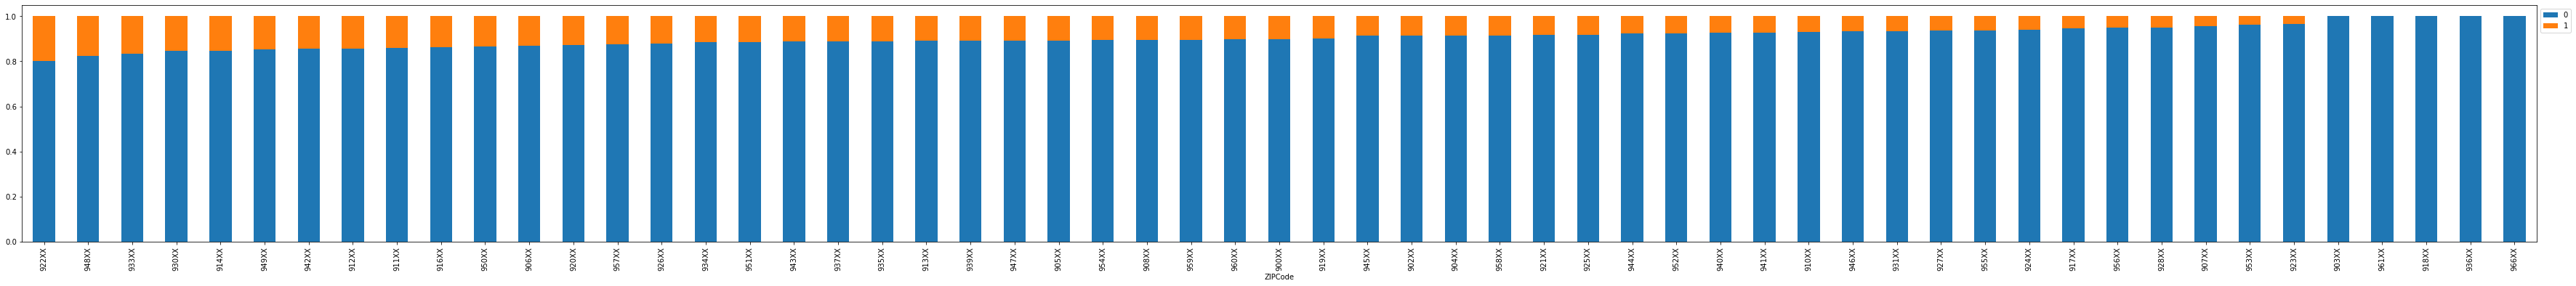

<IPython.core.display.Javascript object>

In [45]:
stacked_barplot(loan, "ZIPCode", "Personal_Loan")

ZIPCode        900XX  902XX  903XX  904XX  905XX  906XX  907XX  908XX  910XX  \
Personal_Loan                                                                  
0                337    147      2     32     25     33     43     17     27   
All              375    161      2     35     28     38     45     19     29   
1                 38     14      0      3      3      5      2      2      2   

ZIPCode        911XX  912XX  913XX  914XX  916XX  917XX  918XX  919XX  920XX  \
Personal_Loan                                                                  
0                 61      6    198     11     25    142      3     37    216   
All               71      7    222     13     29    150      3     41    248   
1                 10      1     24      2      4      8      0      4     32   

ZIPCode        921XX  922XX  923XX  924XX  925XX  926XX  927XX  928XX  930XX  \
Personal_Loan                                                                  
0                256      8     58    

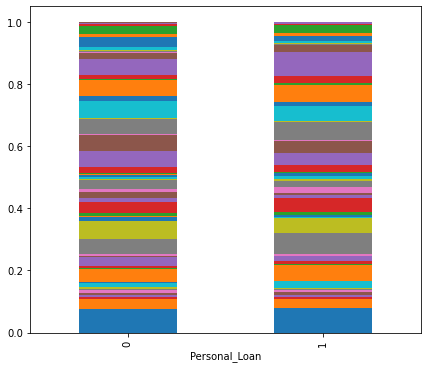

<IPython.core.display.Javascript object>

In [46]:
stacked_barplot(loan, "Personal_Loan", "ZIPCode", legend=False)

* The distribution of ZIPCode by Personal_Loan category was observed to be no significant difference.

### Personal_Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


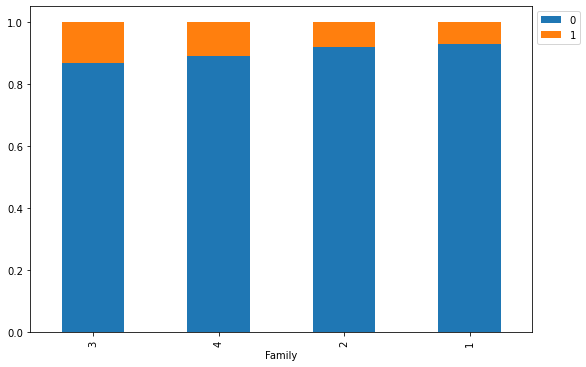

<IPython.core.display.Javascript object>

In [47]:
stacked_barplot(loan, "Family", "Personal_Loan")

* As the number of families increases, a tendency to accept the personal loan has been observed.

### Personal_Loan vs CCAvg

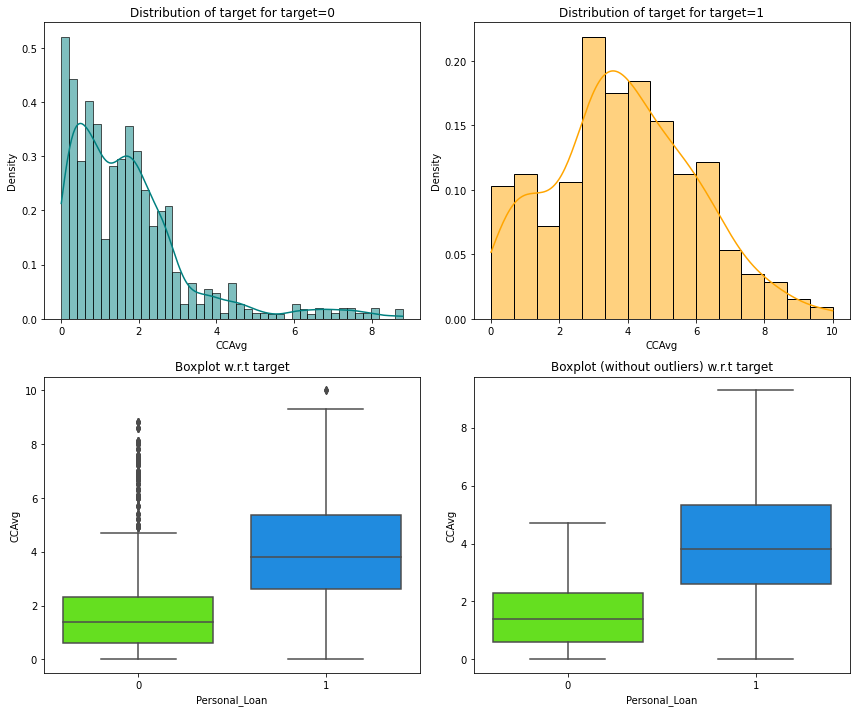

<IPython.core.display.Javascript object>

In [48]:
distribution_plot_wrt_target(loan, "CCAvg", "Personal_Loan")

* The CCAvg of the customer base who accepted the personal loan tended to be higher than those who did not.

### Personal_Loan vs Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


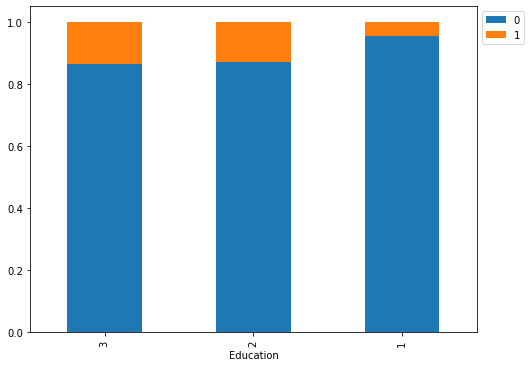

<IPython.core.display.Javascript object>

In [49]:
stacked_barplot(loan, "Education", "Personal_Loan")

* Ungrade customers tended to not accept the personal loan compared to other customer bases.

### Personal_Loan vs Mortgage

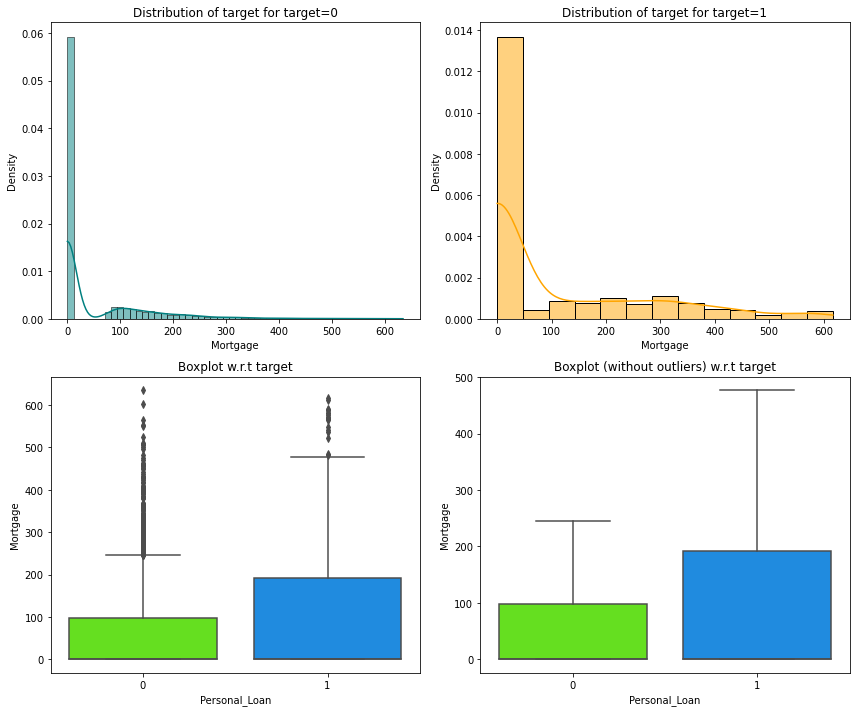

<IPython.core.display.Javascript object>

In [50]:
distribution_plot_wrt_target(loan, "Mortgage", "Personal_Loan")

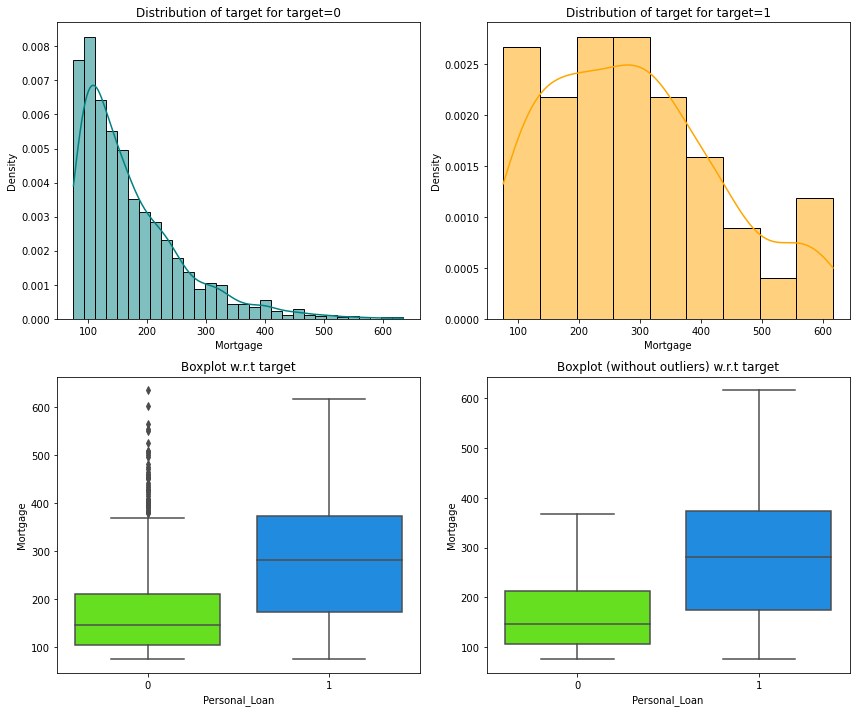

<IPython.core.display.Javascript object>

In [51]:
# plot except 0 mortgage
distribution_plot_wrt_target(loan[loan["Mortgage"] > 0], "Mortgage", "Personal_Loan")

* It was observed that the value of mortgage of those who accepted the personal loan was relatively higher.

### Personal_Loan vs Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


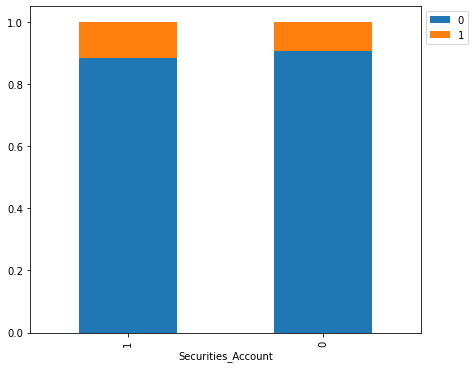

<IPython.core.display.Javascript object>

In [52]:
stacked_barplot(loan, "Securities_Account", "Personal_Loan")

* A significant association was not observed between Securities_Account and Personal_Loan.

### Personal_Loan vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


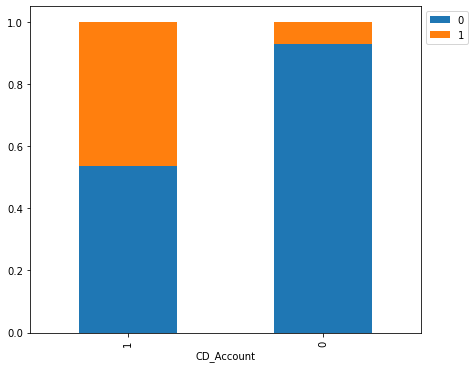

<IPython.core.display.Javascript object>

In [53]:
stacked_barplot(loan, "CD_Account", "Personal_Loan")

* About a half of customers who accepted personal loan in the last campaign have certificate of deposit account.

### Personal_Loan vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


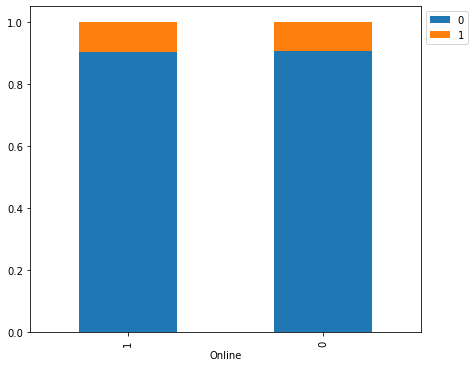

<IPython.core.display.Javascript object>

In [54]:
stacked_barplot(loan, "Online", "Personal_Loan")

* A significant association was not observed between Online and Personal_Loan.

### Personal_Loan vs CreditCard

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


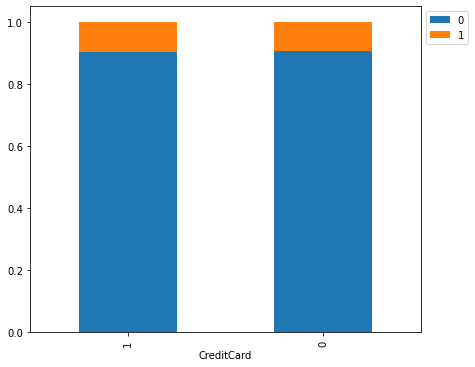

<IPython.core.display.Javascript object>

In [55]:
stacked_barplot(loan, "CreditCard", "Personal_Loan")

* A significant association was not observed between CreditCard and Personal_Loan.

### Income vs CCAvg vs Personal_Loan

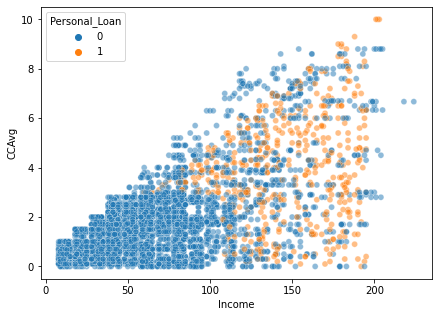

<IPython.core.display.Javascript object>

In [56]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=loan, x="Income", y="CCAvg", hue="Personal_Loan", alpha=0.5)
plt.show()

* It has been observed that only customers above a certain income tend to take out personal loans.

### Income vs CD_Account vs Personal_Loan

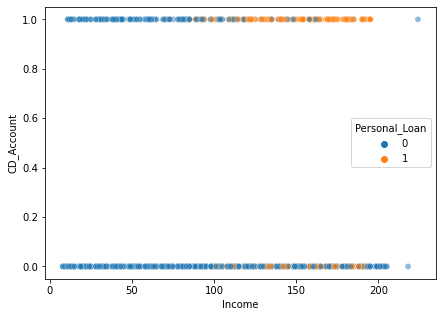

<IPython.core.display.Javascript object>

In [57]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=loan, x="Income", y="CD_Account", hue="Personal_Loan", alpha=0.5)
plt.show()

* It has been observed that customers who have a CD Account and earn more than a certain amount of income tend to accept personal loans.

### Income vs Family vs Personal_Loan

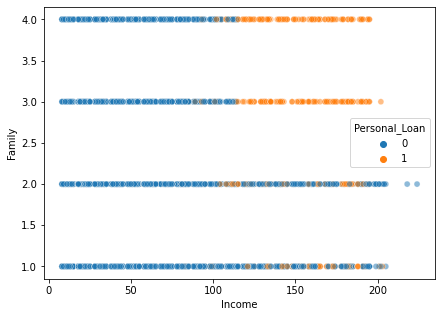

<IPython.core.display.Javascript object>

In [58]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=loan, x="Income", y="Family", hue="Personal_Loan", alpha=0.5)
plt.show()

* It has been observed that customers who have a CD Account and have more than 2 family members tend to accept personal loans.

## Key Observations from EDA

* It was observed that the value of mortgage of those who accepted the personal loan was relatively higher.
* Customers who have a certificates deposit account tend to accept personal loans more easily.
* A tendency has been observed for customers with higher incomes and expenditures to accept more personal loans.
* Customers with a certain income or less do not accept personal loans.
* Having an excess of 2 people has been observed to be more receptive to personal loans.

## Data pre-processing after EDA

### Log-transformation

* Some features are skewed and will likely behave better on the log scale.

In [59]:
cols_to_log = ["Income", "CCAvg", "Mortgage"]

<IPython.core.display.Javascript object>

In [60]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.119600,11.440484,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD_Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


<IPython.core.display.Javascript object>

#### Distributions before log-transformation

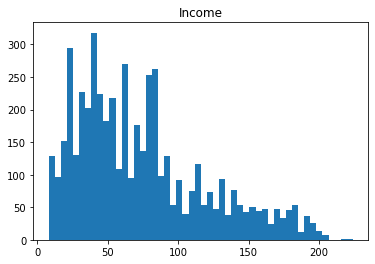

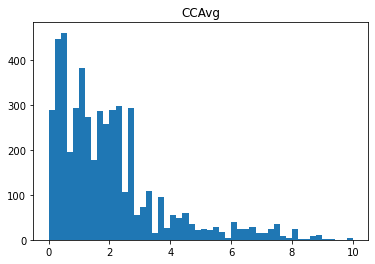

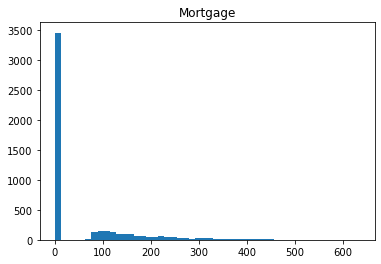

<IPython.core.display.Javascript object>

In [61]:
for colname in cols_to_log:
    plt.hist(loan[colname], bins=50)
    plt.title(colname)
    plt.show()

#### Distributions after log-transformation

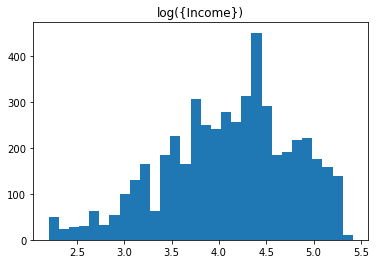

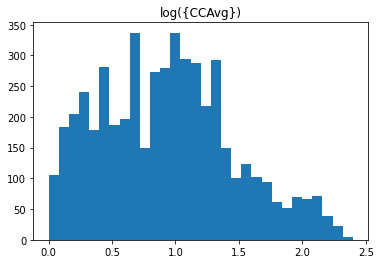

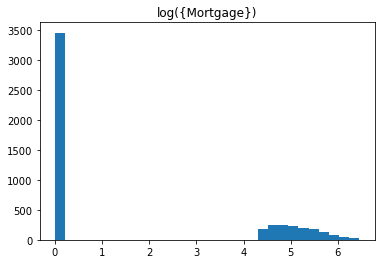

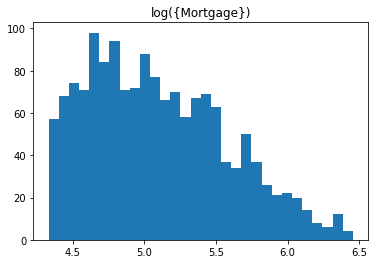

<IPython.core.display.Javascript object>

In [62]:
plt.hist(np.log(loan["Income"] + 1), 30)  # add 1 to aviod -Inf
plt.title("log({Income})")
plt.show()
plt.hist(np.log(loan["CCAvg"] + 1), 30)  # add 1 to aviod -Inf
plt.title("log({CCAvg})")
plt.show()
plt.hist(np.log(loan["Mortgage"] + 1), 30)  # add 1 to aviod -Inf
plt.title("log({Mortgage})")
plt.show()
plt.hist(
    np.log(loan[loan["Mortgage"] > 0]["Mortgage"] + 1), 30
)  # without 0 value in Mortgage
plt.title("log({Mortgage})")
plt.show()

* The skewness of the distributions appears to have decreased after the log transformation.

#### Generating new columns for log-transformed value

In [63]:
for colname in cols_to_log:
    loan[colname + "_log"] = np.log(loan[colname] + 1)

<IPython.core.display.Javascript object>

### One-hot encoding

In [64]:
# creating dummy variables.
X_raw = pd.get_dummies(loan, drop_first=True)

<IPython.core.display.Javascript object>

## Creating training and test set

* Because logistic regression uses linear functions, variables with skewed distribution were used after log-transformation.
* When building the Decision Tree model, the original value was used for interpretation.

### Training and test set for Logistic Regression

In [65]:
# spliting in depedent variable and independent variables.
X_lg = X_raw.drop(
    ["Personal_Loan", "Income", "CCAvg", "Mortgage"], axis=1
)  ## with log-transformed variable for registic regression
y_lg = loan["Personal_Loan"]

# splitting in training and test set for logistic regression
X_lg_train, X_lg_test, y_lg_train, y_lg_test = train_test_split(
    X_lg, y_lg, test_size=0.3, random_state=1
)

<IPython.core.display.Javascript object>

In [66]:
print("Percentage of classes in training set:")
print(y_lg_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_lg_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

### Training and test set for Decision Tree

In [67]:
# spliting in depedent variable and independent variables.
X_dt= X_raw.drop(['Personal_Loan','Income_log','CCAvg_log','Mortgage_log'],axis=1) ## without log-transformed variable for decision tree
y_dt = loan['Personal_Loan']

# splitting in training and test set for decision tree
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(
    X_dt, y_dt, test_size=0.3, random_state=1
)


<IPython.core.display.Javascript object>

In [68]:
print("Percentage of classes in training set:")
print(y_dt_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_dt_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

## Model evaluation criterion

### Model can make wrong predictions as:
 
1. Predicting a customer will not accept a personal loan but in reality the customer would accept it. - False Negative
2. Predicting a customer will accept a personal loan but in reality the customer would not accept it. - False Positive

### Which case is more important? 

* The AllLife Bank wants to increase the success ratio of personal loan conversion.
* The conversion rate is precision, but if the recall (conversion oppertunity) is too low, the bank will lose potential loan customers.
* The bank would want to reduce false positives but also false negative, this can be done by maximizing the F1 score.


## Logistic Regression

### Functions

In [69]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [70]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Build Logistic regression model

In [71]:
model = LogisticRegression(
    solver="newton-cg", random_state=1
)  # newton-cg is faster for high-dimensional data ; lots of ZIPCode
lg = model.fit(X_lg_train, y_lg_train)

<IPython.core.display.Javascript object>

### Coefficients

#### Finding coefficients

In [72]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_lg_train.columns, columns=["coef"]).T

,Age,Experience,Family,Education,Securities_Account,CD_Account,Online,CreditCard,Income_log,CCAvg_log,Mortgage_log,ZIPCode_902XX,ZIPCode_903XX,ZIPCode_904XX,ZIPCode_905XX,ZIPCode_906XX,ZIPCode_907XX,ZIPCode_908XX,ZIPCode_910XX,ZIPCode_911XX,ZIPCode_912XX,ZIPCode_913XX,ZIPCode_914XX,ZIPCode_916XX,ZIPCode_917XX,ZIPCode_918XX,ZIPCode_919XX,ZIPCode_920XX,ZIPCode_921XX,ZIPCode_922XX,ZIPCode_923XX,ZIPCode_924XX,ZIPCode_925XX,ZIPCode_926XX,ZIPCode_927XX,ZIPCode_928XX,ZIPCode_930XX,ZIPCode_931XX,ZIPCode_933XX,ZIPCode_934XX,ZIPCode_935XX,ZIPCode_936XX,ZIPCode_937XX,ZIPCode_939XX,ZIPCode_940XX,ZIPCode_941XX,ZIPCode_942XX,ZIPCode_943XX,ZIPCode_944XX,ZIPCode_945XX,ZIPCode_946XX,ZIPCode_947XX,ZIPCode_948XX,ZIPCode_949XX,ZIPCode_950XX,ZIPCode_951XX,ZIPCode_952XX,ZIPCode_953XX,ZIPCode_954XX,ZIPCode_955XX,ZIPCode_956XX,ZIPCode_957XX,ZIPCode_958XX,ZIPCode_959XX,ZIPCode_960XX,ZIPCode_961XX,ZIPCode_966XX
coef,-0.034321,0.041069,0.700923,1.602554,-0.881303,3.141854,-0.517522,-1.031006,5.909389,0.888856,0.046361,-0.38654,-0.000245,0.017877,0.293458,0.341655,0.007796,-0.03122,-0.152313,0.44786,0.629767,0.125876,-0.172884,-0.475393,-0.304747,-0.558334,-0.1574,-0.177248,0.30581,0.697007,-0.479263,-0.483465,0.632182,0.002389,0.135056,-0.028155,0.276214,0.162818,0.498815,-0.574309,0.232212,-0.045479,0.002687,-0.21362,-0.782517,0.224865,0.171432,0.179504,0.124541,-0.029296,-0.558183,0.276186,0.622684,0.525315,0.047932,0.234215,0.054061,-0.434176,-0.003484,-0.194315,-0.685389,0.529767,0.175799,-0.276231,-0.235026,-0.073552,-0.000054


<IPython.core.display.Javascript object>

#### Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.

In [73]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame(
    {"Odds": odds, "Change_odd%": perc_change_odds}, index=X_lg_train.columns
).T

,Age,Experience,Family,Education,Securities_Account,CD_Account,Online,CreditCard,Income_log,CCAvg_log,Mortgage_log,ZIPCode_902XX,ZIPCode_903XX,ZIPCode_904XX,ZIPCode_905XX,ZIPCode_906XX,ZIPCode_907XX,ZIPCode_908XX,ZIPCode_910XX,ZIPCode_911XX,ZIPCode_912XX,ZIPCode_913XX,ZIPCode_914XX,ZIPCode_916XX,ZIPCode_917XX,ZIPCode_918XX,ZIPCode_919XX,ZIPCode_920XX,ZIPCode_921XX,ZIPCode_922XX,ZIPCode_923XX,ZIPCode_924XX,ZIPCode_925XX,ZIPCode_926XX,ZIPCode_927XX,ZIPCode_928XX,ZIPCode_930XX,ZIPCode_931XX,ZIPCode_933XX,ZIPCode_934XX,ZIPCode_935XX,ZIPCode_936XX,ZIPCode_937XX,ZIPCode_939XX,ZIPCode_940XX,ZIPCode_941XX,ZIPCode_942XX,ZIPCode_943XX,ZIPCode_944XX,ZIPCode_945XX,ZIPCode_946XX,ZIPCode_947XX,ZIPCode_948XX,ZIPCode_949XX,ZIPCode_950XX,ZIPCode_951XX,ZIPCode_952XX,ZIPCode_953XX,ZIPCode_954XX,ZIPCode_955XX,ZIPCode_956XX,ZIPCode_957XX,ZIPCode_958XX,ZIPCode_959XX,ZIPCode_960XX,ZIPCode_961XX,ZIPCode_966XX
Odds,0.966261,1.041924,2.015612,4.965696,0.414243,23.146748,0.595996,0.356648,368.481035,2.432345,1.047453,0.679404,0.999755,1.018037,1.341057,1.407275,1.007826,0.969262,0.858720,1.564959,1.877174,1.134142,0.841236,0.621641,0.737310,0.572161,0.854363,0.837572,1.357725,2.007735,0.619240,0.616643,1.881712,1.002392,1.144601,0.972238,1.318129,1.176823,1.646770,0.563094,1.261387,0.955540,1.002691,0.807655,0.457254,1.252154,1.187004,1.196624,1.132628,0.971129,0.572248,1.318093,1.863924,1.690992,1.049100,1.263916,1.055549,0.647798,0.996522,0.823398,0.503894,1.698537,1.192198,0.758638,0.790550,0.929088,0.999946
Change_odd%,-3.373880,4.192413,101.561151,396.569640,-58.575735,2214.674782,-40.400435,-64.335198,36748.103511,143.234493,4.745282,-32.059629,-0.024483,1.803726,34.105736,40.727529,0.782625,-3.073803,-14.128042,56.495900,87.717355,13.414186,-15.876439,-37.835922,-26.269043,-42.783850,-14.563733,-16.242760,35.772490,100.773518,-38.076032,-38.335676,88.171165,0.239208,14.460108,-2.776204,31.812941,17.682269,64.676951,-43.690592,26.138674,-4.445995,0.269068,-19.234458,-54.274620,25.215388,18.700395,19.662378,13.262840,-2.887112,-42.775205,31.809251,86.392362,69.099155,4.909977,26.391585,5.554944,-35.220200,-0.347792,-17.660161,-49.610584,69.853651,19.219825,-24.136250,-20.944956,-7.091223,-0.005381


<IPython.core.display.Javascript object>

#### Coefficient interpretations

* Coefficients of Income_log, CD_Account, CCAvg_log. Family and some categorical value of ZIPCode are positive, an increase in these will lead to an increase in chances of a customer accept personal loan.
* Coefficients of CreditCard, Securities_Account and some categorical value of ZIPCode are negative, an increase in these will lead to an decrease in chances of a customer accept personal loan.
* In the logristic regression model, Income, CD_Account, Education, CCAvg, and Family were judged as factors influencing personal loan acceptance in the order of.

### Model performance on training set

#### Confusion matrix and performance table

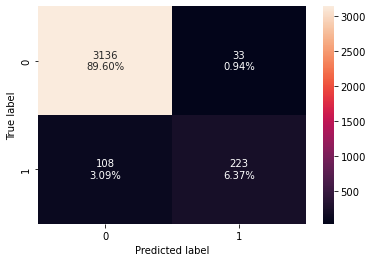

<IPython.core.display.Javascript object>

In [74]:
# creating confusion matrix
confusion_matrix_sklearn(lg, X_lg_train, y_lg_train)

In [75]:
# creating table
log_reg_model_train_perf = model_performance_classification_sklearn(
    lg, X_lg_train, y_lg_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.959714,0.673716,0.871094,0.759796


<IPython.core.display.Javascript object>

* Logistic Regression model is giving a good precision on training set, but the Recall is too low.
* With 0.67 of Recall, the bank would potentially lose a third of their customers who would accept personal loans.

#### ROC-AUC

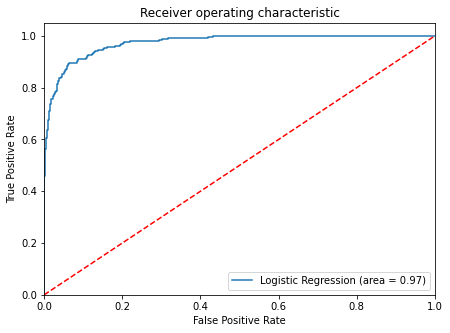

<IPython.core.display.Javascript object>

In [76]:
logit_roc_auc_train = roc_auc_score(y_lg_train, lg.predict_proba(X_lg_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_lg_train, lg.predict_proba(X_lg_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Model performance improvement

#### Optimal threshold using AUC-ROC curve¶

In [77]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_lg_train, lg.predict_proba(X_lg_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.1810053162178779


<IPython.core.display.Javascript object>

#### Checking model performance with optimal threshold from AUC-ROC

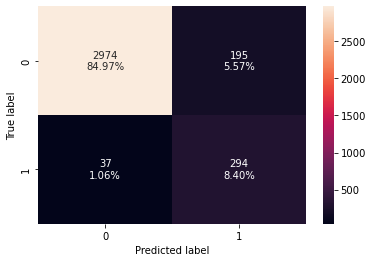

<IPython.core.display.Javascript object>

In [78]:
# creating confusion matrix
confusion_matrix_sklearn(
    lg, X_lg_train, y_lg_train, threshold=optimal_threshold_auc_roc
)

In [79]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn(
    lg, X_lg_train, y_lg_train, threshold=optimal_threshold_auc_roc
)
print("Training performance with optimal threshold:")
log_reg_model_train_perf_threshold_auc_roc

Training performance with optimal threshold:


,Accuracy,Recall,Precision,F1
0,0.933714,0.888218,0.601227,0.717073


<IPython.core.display.Javascript object>

* Precision is important to increasing the conversion ratio of personal loans, but using an AUC-ROC curve seems to be not an appropriate approach for the present problem as it sacrifices too much precision.
* The F1 score that we decided to focus on decreased more than the default model.

#### Optimal threshold using Precision-Recall curve 

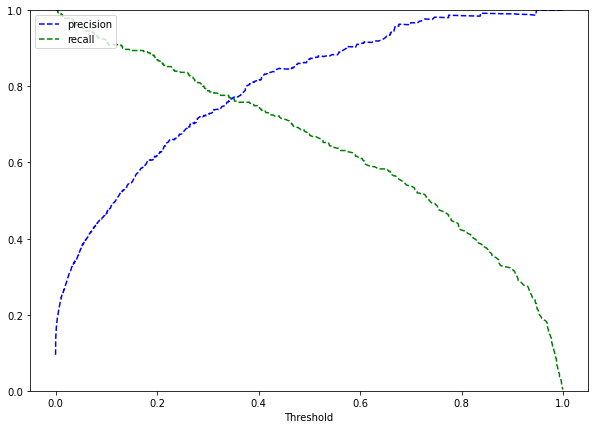

<IPython.core.display.Javascript object>

In [80]:
y_scores = lg.predict_proba(X_lg_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_lg_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [81]:
# Defie optimal threshold
for i, tre_value in enumerate(tre):
    prec_value = float(format(prec[i], "0.4f"))
    rec_value = float(format(rec[i], "0.4f"))
    if prec_value == rec_value:
        print(tre_value, prec_value)
        optimal_threshold_curve = tre_value

0.34757948090166696 0.7674


<IPython.core.display.Javascript object>

* At threshold around 0.35 we will get equal precision and recall.

#### Checking model performance with optimal threshold from Precision-Recall curve

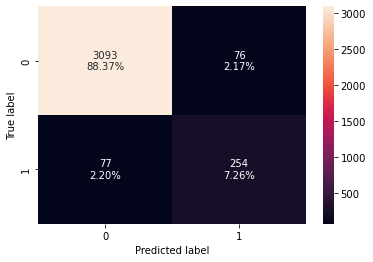

<IPython.core.display.Javascript object>

In [82]:
# creating confusion matrix
confusion_matrix_sklearn(lg, X_lg_train, y_lg_train, threshold=optimal_threshold_curve)

In [83]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn(
    lg, X_lg_train, y_lg_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.956286,0.767372,0.769697,0.768533


<IPython.core.display.Javascript object>

* Precision and F1 score have improved as compared to the initial model.
* The model with threshold of 0.34 (Precision-Recall curve )shows better performance in Precision and F1 scores than the model with threshold of 0.18 (AUC-ROC).


### Model performance on test set

#### Using the model with default threshold

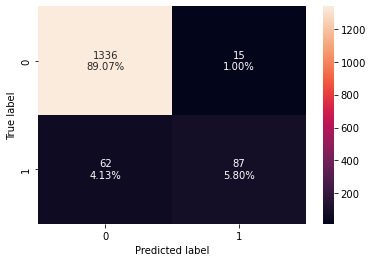

<IPython.core.display.Javascript object>

In [84]:
# creating confusion matrix
confusion_matrix_sklearn(lg, X_lg_test, y_lg_test)

In [85]:
log_reg_model_test_perf = model_performance_classification_sklearn(
    lg, X_lg_test, y_lg_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.948667,0.583893,0.852941,0.693227


<IPython.core.display.Javascript object>

#### ROC-AUC on test set

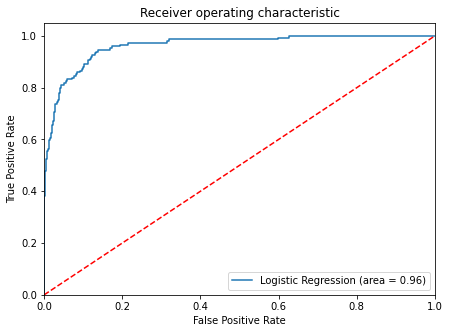

<IPython.core.display.Javascript object>

In [86]:
logit_roc_auc_test = roc_auc_score(y_lg_test, lg.predict_proba(X_lg_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_lg_test, lg.predict_proba(X_lg_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Using the model with threshold of 0.18

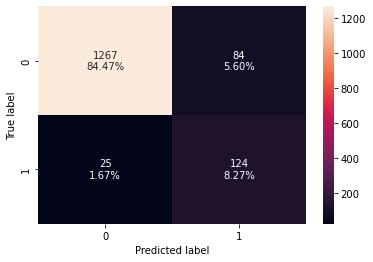

<IPython.core.display.Javascript object>

In [87]:
# creating confusion matrix
confusion_matrix_sklearn(lg, X_lg_test, y_lg_test, threshold=optimal_threshold_auc_roc)

In [88]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn(
    lg, X_lg_test, y_lg_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.927333,0.832215,0.596154,0.694678


<IPython.core.display.Javascript object>

#### Using the model with threshold of 0.34

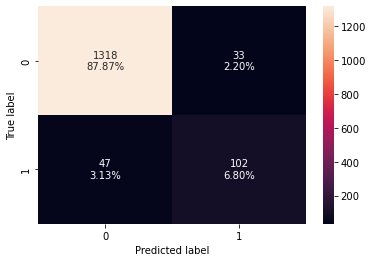

<IPython.core.display.Javascript object>

In [89]:
# creating confusion matrix
confusion_matrix_sklearn(lg, X_lg_test, y_lg_test, threshold=optimal_threshold_curve)

In [90]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn(
    lg, X_lg_test, y_lg_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.946667,0.684564,0.755556,0.71831


<IPython.core.display.Javascript object>

### Model performance summary

#### Training performance

In [91]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression - 0.18 Threshold",
    "Logistic Regression - 0.34 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression - 0.18 Threshold,Logistic Regression - 0.34 Threshold
Accuracy,0.959714,0.933714,0.956286
Recall,0.673716,0.888218,0.767372
Precision,0.871094,0.601227,0.769697
F1,0.759796,0.717073,0.768533


<IPython.core.display.Javascript object>

#### Testing performance

In [92]:
models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.18 Threshold",
    "Logistic Regression-0.34 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.18 Threshold,Logistic Regression-0.34 Threshold
Accuracy,0.948667,0.927333,0.946667
Recall,0.583893,0.832215,0.684564
Precision,0.852941,0.596154,0.755556
F1,0.693227,0.694678,0.718310


<IPython.core.display.Javascript object>

* When the performance of the training set and the test set was compared, overfitting was not observed, but the overall performance was rather low.


## Decision Tree

### Build Decision Tree model

In [93]:
model = DecisionTreeClassifier(
    criterion="gini",
    class_weight={0: 0.1, 1: 0.9},  # Personal_Loan 0 : 90%, Personal_Loan 1 : 10%
    random_state=1,
)
model.fit(X_dt_train, y_dt_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=1)

<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

#### Feature names

In [94]:
column_names = list(X_dt.columns)
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_902XX', 'ZIPCode_903XX', 'ZIPCode_904XX', 'ZIPCode_905XX', 'ZIPCode_906XX', 'ZIPCode_907XX', 'ZIPCode_908XX', 'ZIPCode_910XX', 'ZIPCode_911XX', 'ZIPCode_912XX', 'ZIPCode_913XX', 'ZIPCode_914XX', 'ZIPCode_916XX', 'ZIPCode_917XX', 'ZIPCode_918XX', 'ZIPCode_919XX', 'ZIPCode_920XX', 'ZIPCode_921XX', 'ZIPCode_922XX', 'ZIPCode_923XX', 'ZIPCode_924XX', 'ZIPCode_925XX', 'ZIPCode_926XX', 'ZIPCode_927XX', 'ZIPCode_928XX', 'ZIPCode_930XX', 'ZIPCode_931XX', 'ZIPCode_933XX', 'ZIPCode_934XX', 'ZIPCode_935XX', 'ZIPCode_936XX', 'ZIPCode_937XX', 'ZIPCode_939XX', 'ZIPCode_940XX', 'ZIPCode_941XX', 'ZIPCode_942XX', 'ZIPCode_943XX', 'ZIPCode_944XX', 'ZIPCode_945XX', 'ZIPCode_946XX', 'ZIPCode_947XX', 'ZIPCode_948XX', 'ZIPCode_949XX', 'ZIPCode_950XX', 'ZIPCode_951XX', 'ZIPCode_952XX', 'ZIPCode_953XX', 'ZIPCode_954XX', 'ZIPCode_955XX', 'ZIPCode_956XX', 'ZIPCode_957XX

<IPython.core.display.Javascript object>

#### Decision Tree

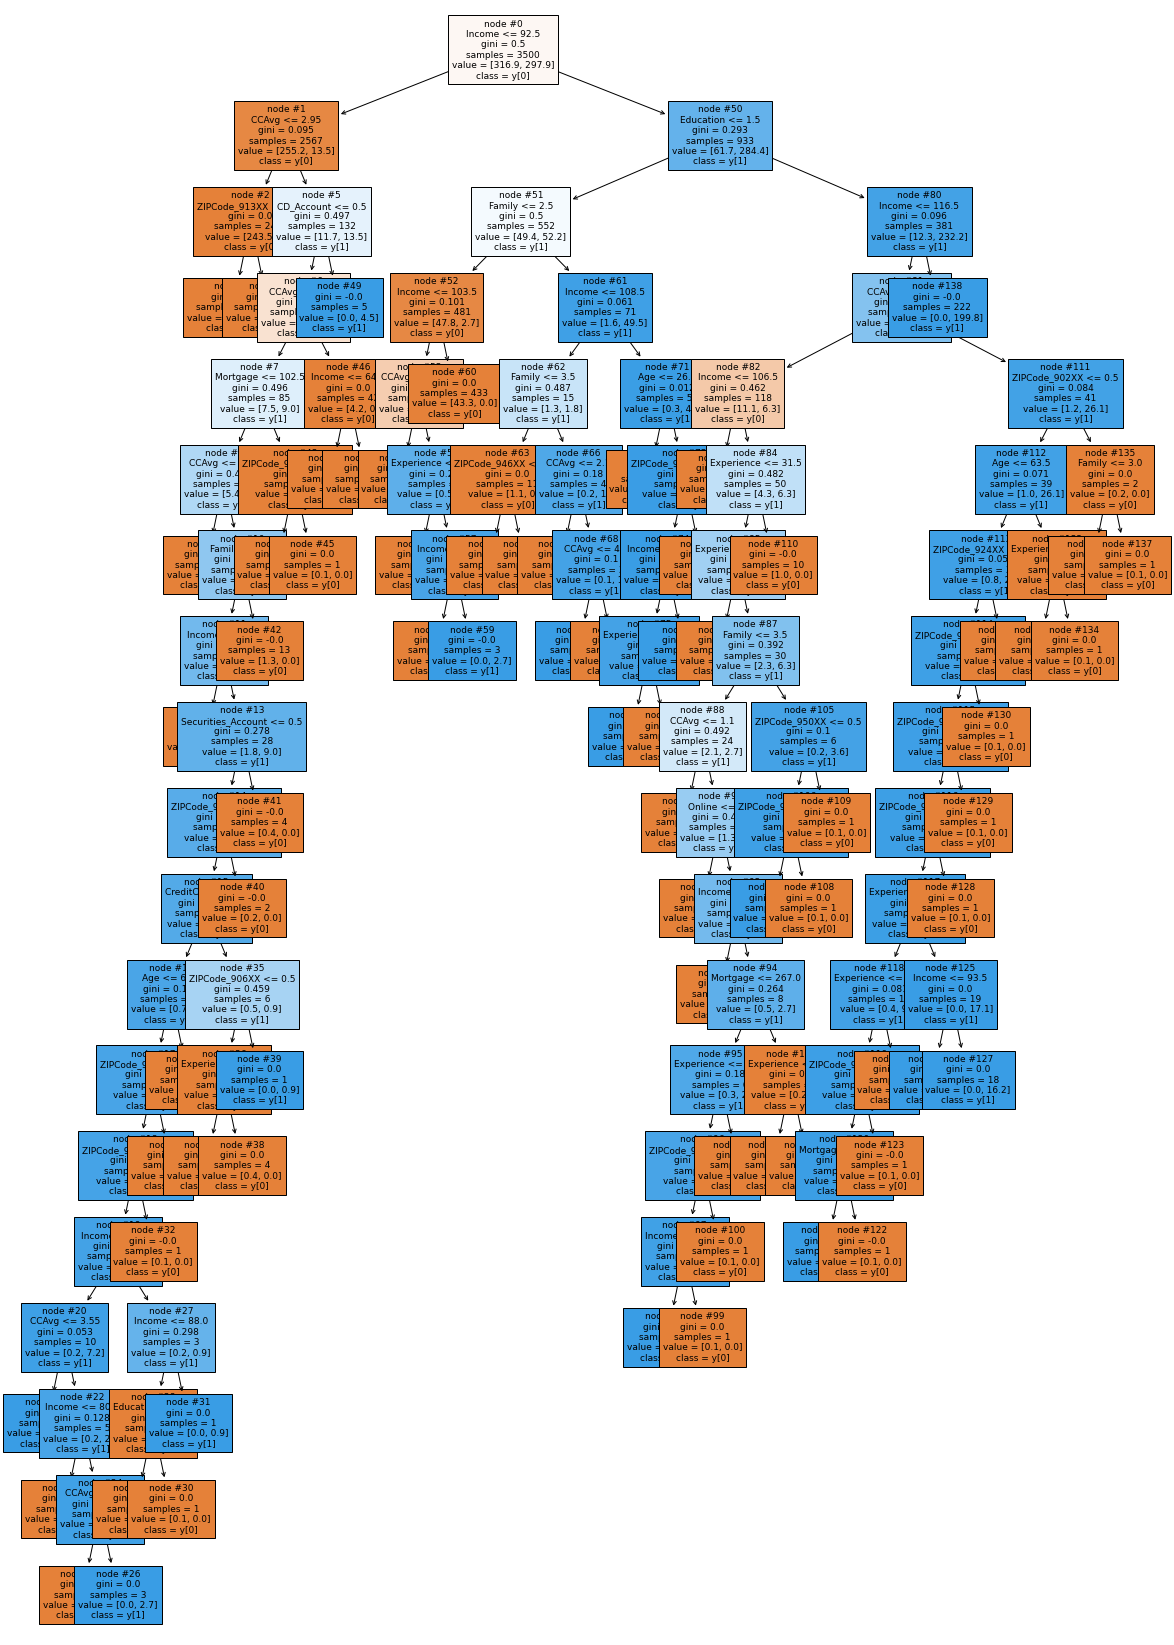

<IPython.core.display.Javascript object>

In [95]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [96]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- ZIPCode_913XX <= 0.50
|   |   |   |--- weights: [233.40, 0.00] class: 0
|   |   |--- ZIPCode_913XX >  0.50
|   |   |   |--- weights: [10.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |--- weights: [1.50, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- Income <= 67.00
|   |   |   |   |   |   |   |   |--- weights: [0.80, 0.00] class: 0
|   |   |   |   |   |   |   |--- Income >  67.00
|   |   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |   |--- ZIPCode_920XX <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- CreditCard <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- 

<IPython.core.display.Javascript object>

#### Feature importances

In [97]:
# importance of features in the tree building
print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_dt_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                             Imp
Income              6.310621e-01
Family              1.489246e-01
CCAvg               8.991935e-02
Education           8.882049e-02
Experience          9.659745e-03
CD_Account          7.690498e-03
Mortgage            6.295441e-03
Age                 2.419676e-03
ZIPCode_906XX       2.093272e-03
Securities_Account  1.878577e-03
Online              1.695550e-03
ZIPCode_956XX       1.213866e-03
ZIPCode_902XX       1.199279e-03
ZIPCode_920XX       9.945408e-04
ZIPCode_930XX       6.471642e-04
ZIPCode_943XX       6.336390e-04
ZIPCode_919XX       6.300818e-04
ZIPCode_939XX       6.246392e-04
ZIPCode_934XX       6.199777e-04
ZIPCode_924XX       6.153682e-04
CreditCard          6.061533e-04
ZIPCode_950XX       6.002896e-04
ZIPCode_911XX       5.846724e-04
ZIPCode_926XX       5.710754e-04
ZIPCode_913XX       1.478869e-14
ZIPCode_947XX       4.555037e-17
ZIPCode_946XX       7.157915e-18
ZIPCode_917XX       0.000000e+00
ZIPCode_952XX       0.000000e+00
ZIPCode_94

<IPython.core.display.Javascript object>

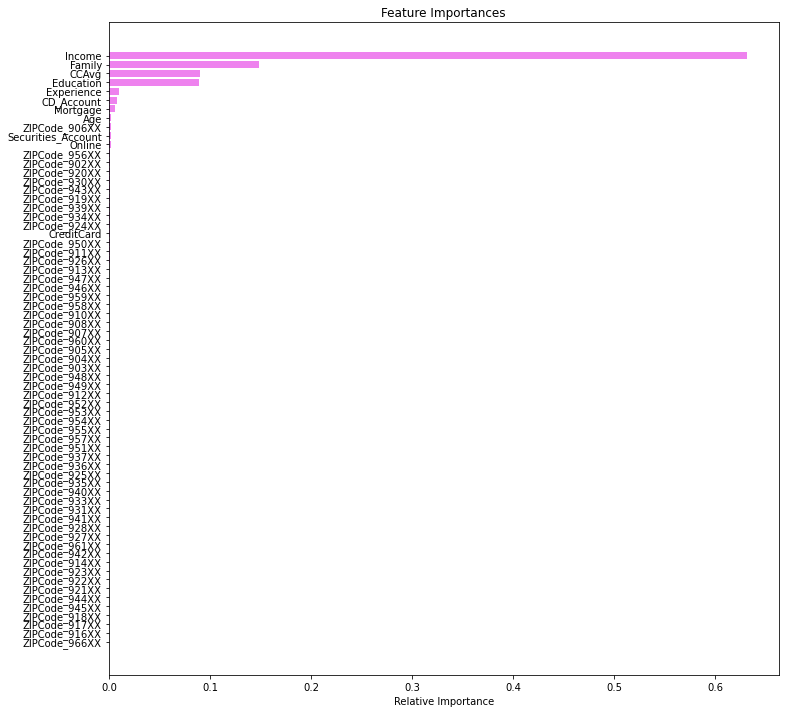

<IPython.core.display.Javascript object>

In [98]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Income, Family and CCAvg are the top 3 important features.

### Model performance on training set

In [99]:
decision_tree_train = model_performance_classification_sklearn(
    model, X_dt_train, y_dt_train
)
decision_tree_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

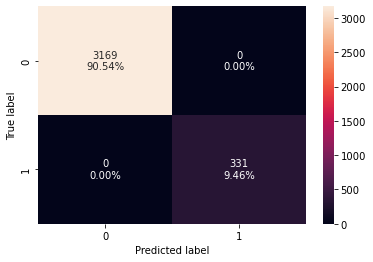

<IPython.core.display.Javascript object>

In [100]:
confusion_matrix_sklearn(model, X_dt_train, y_dt_train)

### Model performance improvement

#### Using GridSearch for Hyperparameter tuning of our tree model

In [101]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.1, 1: 0.9})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 6, 7, 8, 9, 10, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.00005, 0.0001, 0.0005, 0.01, 0.05],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)  ## f1 score was decided to focus on

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_dt_train, y_dt_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_dt_train, y_dt_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9},
                       min_impurity_decrease=0.0001, random_state=1)

<IPython.core.display.Javascript object>

* As a result of focusing on f1 score, it was tuned so that there is little difference from the initial model.

#### Checking model performance with optimal hyperparameter

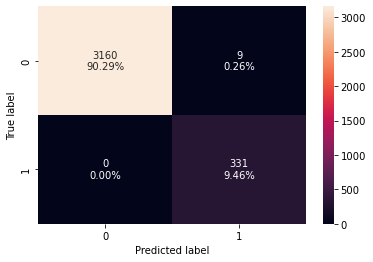

<IPython.core.display.Javascript object>

In [102]:
confusion_matrix_sklearn(estimator, X_dt_train, y_dt_train)

In [103]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_dt_train, y_dt_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.997429,1.0,0.973529,0.986587


<IPython.core.display.Javascript object>

#### Cost Complexity Pruning

In [104]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.1, 1: 0.9},)
path = clf.cost_complexity_pruning_path(X_dt_train, y_dt_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [105]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-2.692616e-15
1,1.805828e-19,-2.692435e-15
2,7.223312e-19,-2.691713e-15
3,1.083497e-18,-2.690629e-15
4,3.575539e-18,-2.687054e-15
5,9.029140e-18,-2.678025e-15
6,9.426422e-18,-2.668598e-15
7,2.161576e-17,-2.646983e-15
8,2.275343e-17,-2.624229e-15
9,2.419448e-16,-2.382284e-15


<IPython.core.display.Javascript object>

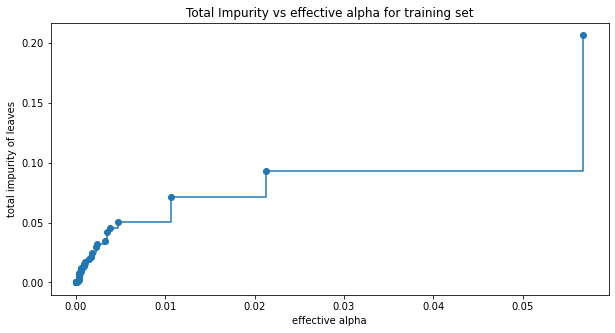

<IPython.core.display.Javascript object>

In [106]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [107]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.1, 1: 0.9}
    )
    clf.fit(X_dt_train, y_dt_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.29287854019800347


<IPython.core.display.Javascript object>

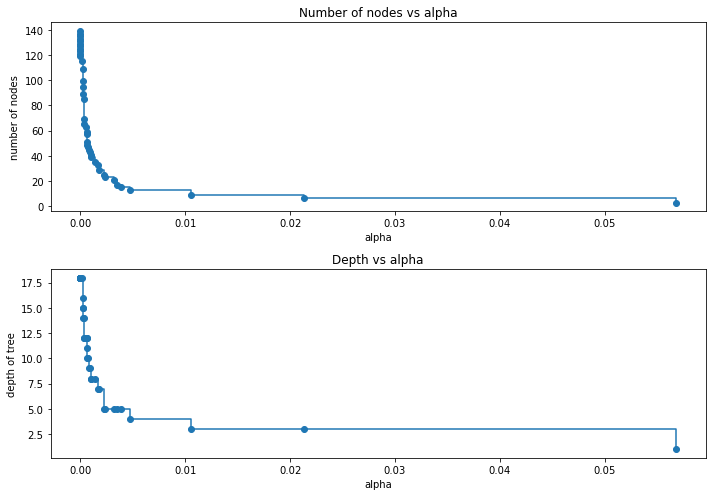

<IPython.core.display.Javascript object>

In [108]:
# The last element in clfs and ccp_alphas were removed because it is the trivial tree with only one node.
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]


node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Recall/Precision/F1 score vs alpha for training and testing sets

In [109]:
f1_train = []
f1_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

for clf in clfs:
    pred_train = clf.predict(X_dt_train)
    pred_test = clf.predict(X_dt_test)
    # Recall
    recall_train_value = recall_score(y_dt_train, pred_train)
    recall_test_value = recall_score(y_dt_test, pred_test)
    recall_train.append(recall_train_value)
    recall_test.append(recall_test_value)

    # Precision
    precision_train_value = precision_score(y_dt_train, pred_train)
    precision_test_value = precision_score(y_dt_test, pred_test)
    precision_train.append(precision_train_value)
    precision_test.append(precision_test_value)

    # F1 score
    f1_train_value = f1_score(y_dt_train, pred_train)
    f1_test_value = f1_score(y_dt_test, pred_test)
    f1_train.append(f1_train_value)
    f1_test.append(f1_test_value)


<IPython.core.display.Javascript object>

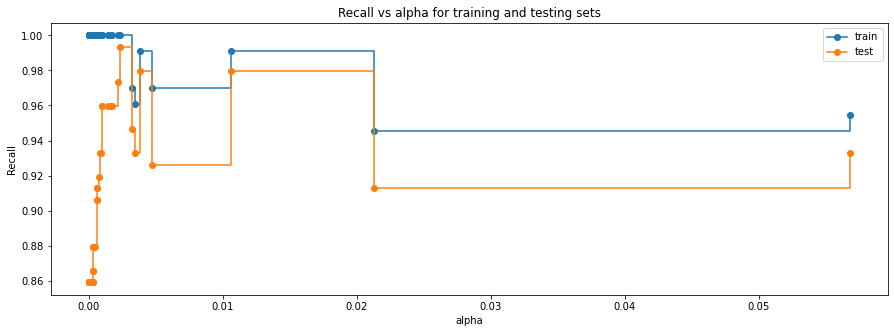

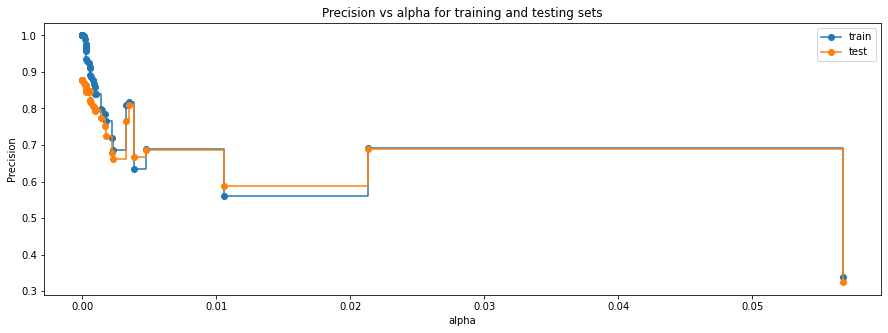

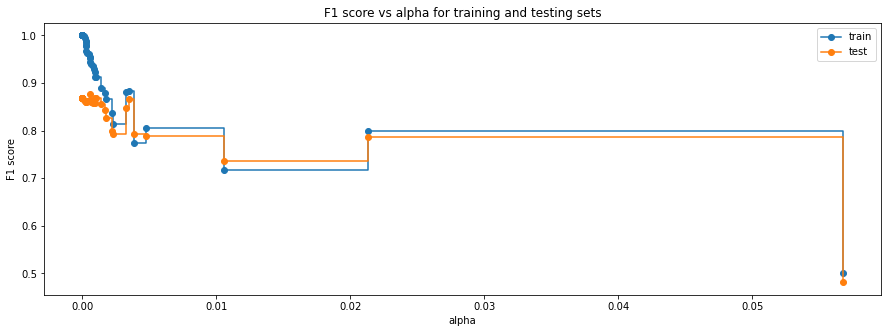

<IPython.core.display.Javascript object>

In [110]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Precision")
ax.set_title("Precision vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, precision_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, precision_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 score")
ax.set_title("F1 score vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [111]:
# creating the model where we get highest train and test f1
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.000603520769053439,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)


<IPython.core.display.Javascript object>

In [112]:
best_model.fit(X_dt_train, y_dt_train)

DecisionTreeClassifier(ccp_alpha=0.000603520769053439,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance with optimal ccp_alpha

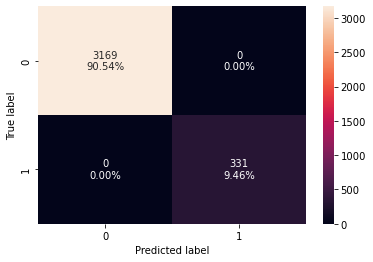

<IPython.core.display.Javascript object>

In [113]:
confusion_matrix_sklearn(model, X_dt_train, y_dt_train)

In [114]:
decision_tree_best_train = model_performance_classification_sklearn(
    best_model, X_dt_train, y_dt_train
)
decision_tree_best_train

,Accuracy,Recall,Precision,F1
0,0.991143,1.0,0.914365,0.955267


<IPython.core.display.Javascript object>

### Model performance on test set

#### Using default model

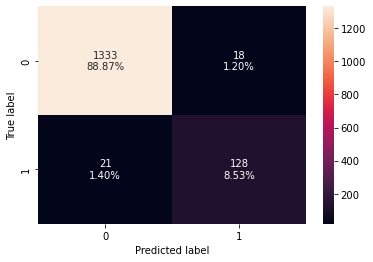

<IPython.core.display.Javascript object>

In [115]:
confusion_matrix_sklearn(model, X_dt_test, y_dt_test)

In [116]:
decision_tree_test = model_performance_classification_sklearn(
    model, X_dt_test, y_dt_test
)
decision_tree_test

,Accuracy,Recall,Precision,F1
0,0.974,0.85906,0.876712,0.867797


<IPython.core.display.Javascript object>

#### Using the model adjusted by GridSearch

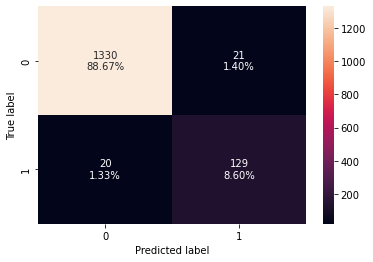

<IPython.core.display.Javascript object>

In [117]:
confusion_matrix_sklearn(estimator, X_dt_test, y_dt_test)

In [118]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_dt_test, y_dt_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.972667,0.865772,0.86,0.862876


<IPython.core.display.Javascript object>

#### Using the model adjusted by alpha

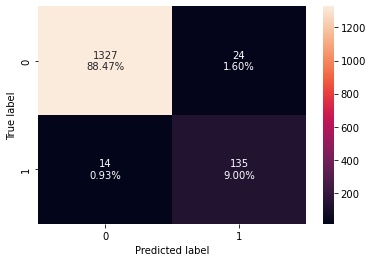

<IPython.core.display.Javascript object>

In [119]:
confusion_matrix_sklearn(best_model, X_dt_test, y_dt_test)

In [120]:
decision_tree_best_test = model_performance_classification_sklearn(
    best_model, X_dt_test, y_dt_test
)
decision_tree_best_test

,Accuracy,Recall,Precision,F1
0,0.974667,0.90604,0.849057,0.876623


<IPython.core.display.Javascript object>

* This model shows the highest F1 score in the test set.


### Visualizing the Decision Tree model of the highest F1 score

#### Decision Tree

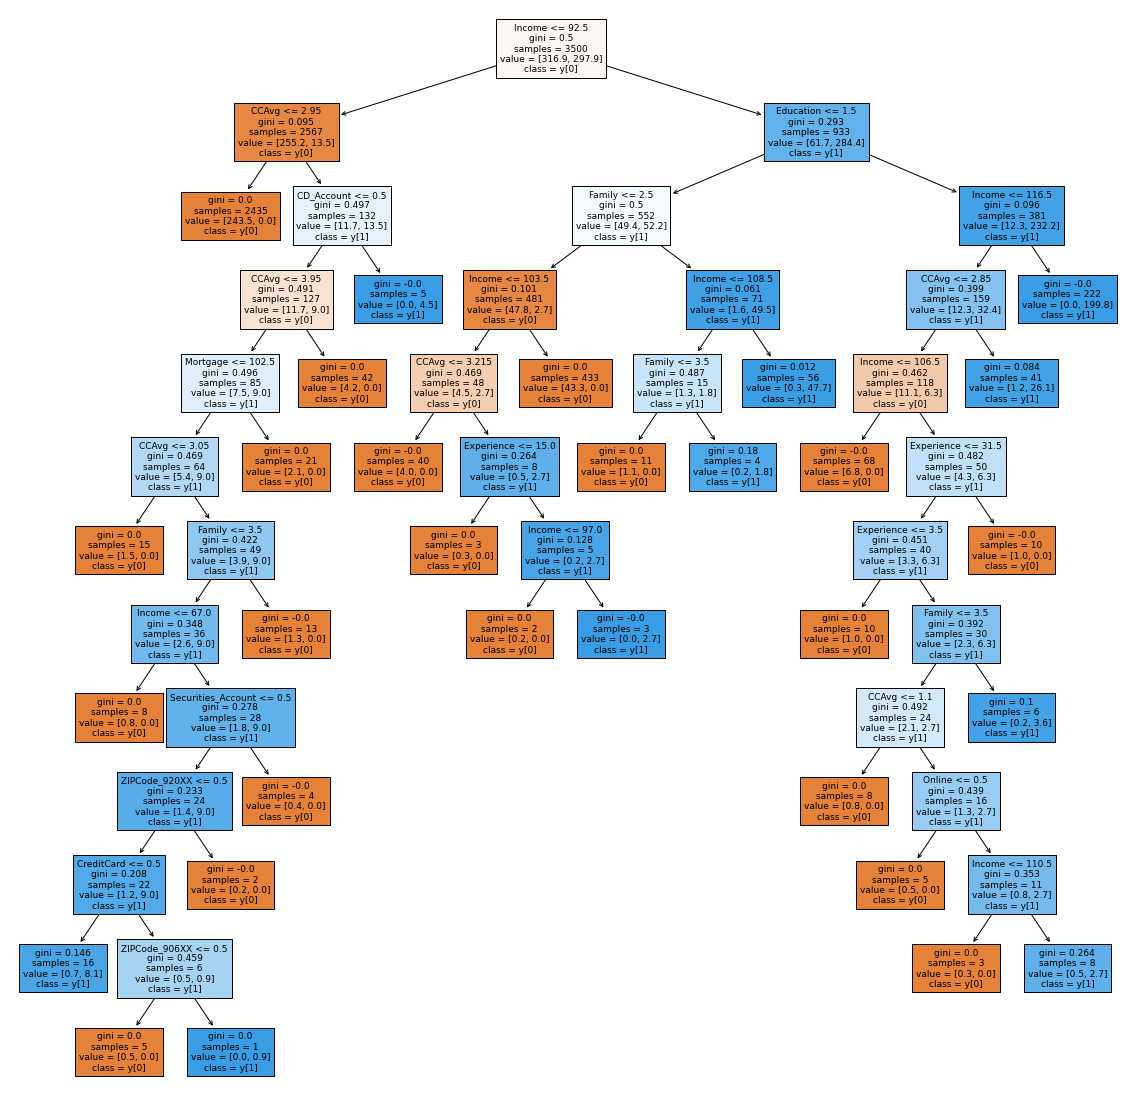

<IPython.core.display.Javascript object>

In [121]:
plt.figure(figsize=(20, 20))
out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [122]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [243.50, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |--- weights: [1.50, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- Income <= 67.00
|   |   |   |   |   |   |   |   |--- weights: [0.80, 0.00] class: 0
|   |   |   |   |   |   |   |--- Income >  67.00
|   |   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |   |--- ZIPCode_920XX <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- CreditCard <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.70, 8.10] class: 1
|   |   |   |   |   |   |   |   |   |   |--- CreditCard >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   

<IPython.core.display.Javascript object>

#### Feature importances

In [123]:
print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_dt_test.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                         Imp
Income              0.640621
Family              0.151772
Education           0.090519
CCAvg               0.089748
CD_Account          0.007838
Experience          0.007343
Mortgage            0.004751
ZIPCode_906XX       0.002133
Securities_Account  0.001914
Online              0.001728
ZIPCode_920XX       0.001014
CreditCard          0.000618
ZIPCode_943XX       0.000000
ZIPCode_946XX       0.000000
ZIPCode_945XX       0.000000
ZIPCode_944XX       0.000000
Age                 0.000000
ZIPCode_939XX       0.000000
ZIPCode_942XX       0.000000
ZIPCode_941XX       0.000000
ZIPCode_940XX       0.000000
ZIPCode_948XX       0.000000
ZIPCode_937XX       0.000000
ZIPCode_947XX       0.000000
ZIPCode_954XX       0.000000
ZIPCode_949XX       0.000000
ZIPCode_950XX       0.000000
ZIPCode_951XX       0.000000
ZIPCode_952XX       0.000000
ZIPCode_953XX       0.000000
ZIPCode_935XX       0.000000
ZIPCode_955XX       0.000000
ZIPCode_956XX       0.000000
ZIPCode_957XX 

<IPython.core.display.Javascript object>

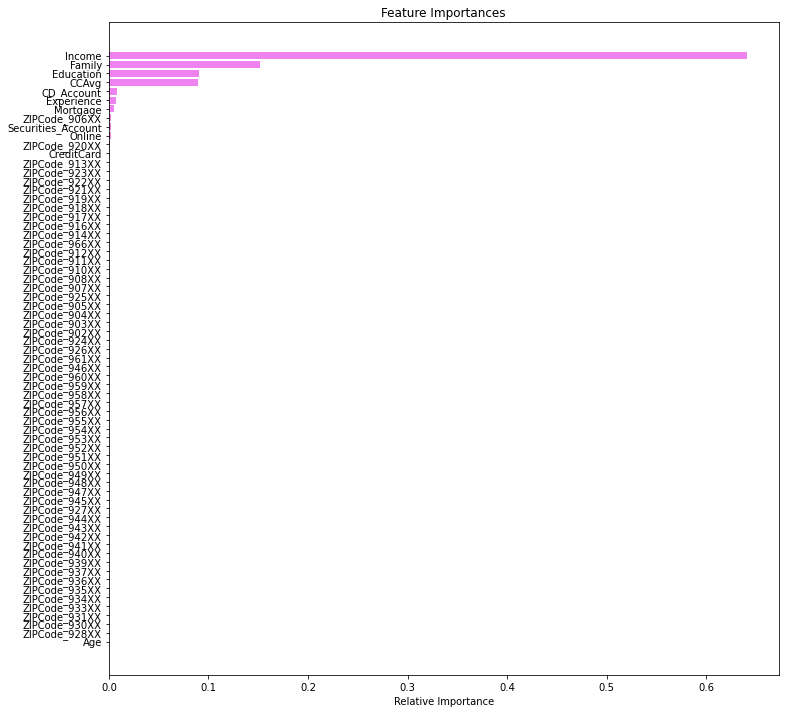

<IPython.core.display.Javascript object>

In [124]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* As in the initial model, Income, Family and CCAvg are the top 3 important features.

### Model Performace Summary

#### Training performance

In [125]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_best_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-pruning)",
    "Decision Tree (Post-pruning)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-pruning),Decision Tree (Post-pruning)
Accuracy,1.0,0.997429,0.991143
Recall,1.0,1.000000,1.000000
Precision,1.0,0.973529,0.914365
F1,1.0,0.986587,0.955267


<IPython.core.display.Javascript object>

#### Testing performance

In [126]:
# training performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_test.T, decision_tree_tune_perf_test.T, decision_tree_best_test.T,],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-pruning)",
    "Decision Tree (Post-pruning)",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-pruning),Decision Tree (Post-pruning)
Accuracy,0.974000,0.972667,0.974667
Recall,0.859060,0.865772,0.906040
Precision,0.876712,0.860000,0.849057
F1,0.867797,0.862876,0.876623


<IPython.core.display.Javascript object>

* When the performance of the training set and the test set was compared, overfitting was observed.

## Conclusion

* Customers with less than a certain income do not accept a conversion of personal loan.


* The larger the number of families, the more likely customers are to accept a personal loan conversion.


* Logistic regression
  - A significant improvement in performance was possible through threshold adjustment of the logistic regression model.
  - The model achieved a F1 score of 0.72 on the testing set with threshold set at 0.34.
  - Income, CD_Account and Education are the top 3 important features in Logistic regression model. 
  
  
* Decision Tree
  - Compared to recall, the precision could not be easily elevated.
  - The model achieved a F1 score of 0.88 on the testing set with ccp_alpha at 0.0006.
  - Income, Family and CCAvg are the top 3 important features in Decision Tree model.
  
  
* The decision tree model has a better performance in the test set than the logistic regression model.
  - F1 score of the best model of logistric regression : 0.718310
  - F1 score of the best model of Decision Tree : 0.876623

## Business Recommendations

* According to the decision tree model which have a better performance, the criteria for proposing a personal loan should depend on three main factors: Income, CCAvg and family.
  - Customers earning less than 67,000 dollars per year will not accept personal loans.
  - Customers with annual incomes of 92,500 dollars or more, customers with average monthly credit card usage of 2,950 dollars and customers with families of three or more would be more likely to get a personal loan.


* It is recommended to strengthen publicity for attracting new customers for those with income above a certain level and children.


* After offering personal loan conversion to existing customers based on the current model, the bank can rebuild the model based on a high recall rate to increase the bank's gross profit.

